In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as DF
from sympy import diff
from sympy.abc import x,y
from sympy import cos
from sympy import *
from sympy import lambdify
from itertools import product
import random
from scipy.linalg import norm
import time
import re
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
# Defining equation of linear line of best fit 
def fitfunc(x, m):
    return x*m

**Define path.**

In [3]:
# Defining path to folder raw data is saved in
path = "C:/Users/robtk/OneDrive/Desktop/DIAS Internship/Raw data/Harmonic oscillator warm up/"

### Set display of pandas dataframes and Series to 11 decimal places

In [4]:
pd.set_option("display.precision", 11)

## Distance formula

In [5]:
# INPUT: X1, and X2 are of the type :   ~~~~X_DF.iloc[i+1,:])~~~~~

#Then you can use the following code:
#X1_distance = []
#for i in range(len(X71_DF["X1"])-1):
#    X1_distance.append(Distance(X71_DF.iloc[i+1,:], X72_DF.iloc[i+1,:]))

def Distance(X1, X2):
    
    sumX = 0
    for j in range(9):
        deltaX = np.array(X1[j])-np.array(X2[j])
        
        argument = np.trace( np.matmul(deltaX, deltaX) ).real

        sumX += argument
    
    return np.sqrt(sumX)

# Read in H outputs

In [6]:
Hdata = []
Hnumbers1 = []
for line in open(path+'H_original_Nis4_472.5ffast.txt'):
    Hdata = line.split(" ")
    
    for j in range(len(Hdata)):
        Hnumbers1.append(float(Hdata[j]))
    
Hdata = []
Hnumbers2 = []
for line in open(path+'H_perturbed_Nis4_472.5ffast.txt'):
    Hdata = line.split(" ")
    
    for j in range(len(Hdata)):
        Hnumbers2.append(float(Hdata[j]))



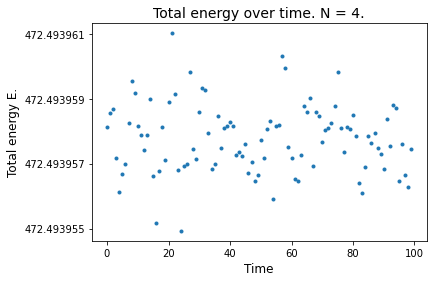

In [7]:
delta_t = 1e-4
simulation_repetitions = 100/1e-4
record_steps = 10000
times = np.arange(0, simulation_repetitions/record_steps, delta_t*record_steps)

plt.plot(times, Hnumbers1, ".", label = "Unperturbed state")
#plt.plot(times, Hnumbers2, ".", label = "Perturbed state")
plt.ylabel("Total energy E.",fontsize =12)
plt.title("Total energy over time. N = 4.", fontsize =14)
plt.yticks([472.493955, 472.493957, 472.493959, 472.493961],labels =["472.493955","472.493957", "472.493959", "472.493961"])
plt.xlabel("Time", fontsize =12);

plt.savefig("Hconserved", dpi = 100, bbox_inches = "tight")

## Read in the outputs for 9 4x4 Complex Matrices

In [8]:
X2_630ffast_DF

NameError: name 'X2_630ffast_DF' is not defined

In [43]:
Nis4_names = ["63.txt", "630ffast.txt", "630_3.txt", "315ffast.txt", "157.5ffast.txt", "472.5ffast.txt", "1260.txt", "1890.txt", "3150ffast.txt"]

In [45]:
Nis4_names[7]

'1890.txt'

In [47]:
data = []
my_regex = re.compile("-?\d+.\d+")
for line in open(path+'X_original_Nis4_'+Nis4_names[7]):
    items = re.findall(my_regex, line)
    

    curr_items = [] 
    for k in range(int((len(items))/2)):
        curr_items.append(complex(float(items[2*k]), float(items[2*k+1])))
    data.append(curr_items)


data = np.array(data).reshape(-1, 4, np.array(data).shape[1])

X_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    X_matrices[i] = data[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# X_matrices is now a list of 9 arrays, each holding the time evolutions of X1-X9 respectively.

# Put each array into a column of a dataframe
labels = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]

delta_t = 1*10**-4
record_steps = 1000
seconds_simulated = 100
simulation_repetitions = seconds_simulated / delta_t

times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

X4_1890_original_DF = pd.DataFrame({"X1" : X_matrices[0].tolist(), "X2" : X_matrices[1].tolist(), "X3" : X_matrices[2].tolist(), "X4" : X_matrices[3].tolist(), "X5" : X_matrices[4].tolist(),
                     "X6" : X_matrices[5].tolist(), "X7" : X_matrices[6].tolist(), "X8" : X_matrices[7].tolist(), "X9" : X_matrices[8].tolist()}, index = times,
                    columns = labels)


original
perturbed

X4_63_original_DF, X4_63_perturbed_DF, 
                   X4_157_5_original_DF, X4_157_5_perturbed_DF, 
                   X4_315_original_DF, X4_315_perturbed_DF,
                   X4_630_original_DF, X4_630_perturbed_DF,
                   X4_630_3_original_DF, X4_630_3_perturbed_DF,
                   X4_1260_original_DF, X4_1260_perturbed_DF,
                   X4_1890_original_DF, X4_1890_perturbed_DF

In [54]:
data = []
my_regex = re.compile("-?\d+.\d+")
for line in open(path+'X_original_Nis4_1260_5.txt'):
    items = re.findall(my_regex, line)
    

    curr_items = [] 
    for k in range(int((len(items))/2)):
        curr_items.append(complex(float(items[2*k]), float(items[2*k+1])))
    data.append(curr_items)


data = np.array(data).reshape(-1, 4, np.array(data).shape[1])

X_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    X_matrices[i] = data[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# X_matrices is now a list of 9 arrays, each holding the time evolutions of X1-X9 respectively.

# Put each array into a column of a dataframe
labels = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]

delta_t = 1*10**-4
record_steps = 1000
seconds_simulated = 100
simulation_repetitions = seconds_simulated / delta_t

times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

X4_1260_error0_original_DF = pd.DataFrame({"X1" : X_matrices[0].tolist(), "X2" : X_matrices[1].tolist(), "X3" : X_matrices[2].tolist(), "X4" : X_matrices[3].tolist(), "X5" : X_matrices[4].tolist(),
                     "X6" : X_matrices[5].tolist(), "X7" : X_matrices[6].tolist(), "X8" : X_matrices[7].tolist(), "X9" : X_matrices[8].tolist()}, index = times,
                    columns = labels)


In [ ]:
data = []
my_regex = re.compile("-?\d+.\d+")

for line in open(path+'V_perturbed_1_sim5.txt'):
    items = re.findall(my_regex, line)
    

    curr_items = [] 
    for k in range(int((len(items))/2)):
        curr_items.append(complex(float(items[2*k]), float(items[2*k+1])))
    data.append(curr_items)

data = np.array(data).reshape(-1, 4, np.array(data).shape[1])

V_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    V_matrices[i] = data[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# V_matrices is now a list of 9 arrays, each holding the time evolutions of V1-V9 respectively.


# Put each array into a column of a dataframe
labels = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9"]

delta_t = 1*10**-4
record_steps = 1000
seconds_simulated = 100
simulation_repetitions = seconds_simulated / delta_t

times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

V1_DF = pd.DataFrame({"V1" : V_matrices[0].tolist(), "V2" : V_matrices[1].tolist(), "V3" : V_matrices[2].tolist(), "V4" : V_matrices[3].tolist(), "V5" : V_matrices[4].tolist(),
                     "V6" : V_matrices[5].tolist(), "V7" : V_matrices[6].tolist(), "V8" : V_matrices[7].tolist(), "V9" : V_matrices[8].tolist()}, index = times,
                    columns = labels)


# 7X7 Complex matrices

In [349]:
Nis7_names = ["26.1.txt", "130.5.txt", "195.75.txt", "522.txt"]

In [354]:
index = 3

data = []
my_regex = re.compile("-?\d+.\d+")
for line in open(path+'X_originalNis7_'+Nis7_names[index]):
    items = re.findall(my_regex, line)
    

    curr_items = [] 
    for k in range(int((len(items))/2)):
        curr_items.append(complex(float(items[2*k]), float(items[2*k+1])))
    data.append(curr_items)


data = np.array(data).reshape(-1, 7, np.array(data).shape[1])

X_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    X_matrices[i] = data[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# X_matrices is now a list of 9 arrays, each holding the time evolutions of X1-X9 respectively.

# Put each array into a column of a dataframe
labels = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]

delta_t = 1*10**-4
record_steps = 1000
seconds_simulated = 150
simulation_repetitions = seconds_simulated / delta_t

times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

X7_522_original_DF = pd.DataFrame({"X1" : X_matrices[0].tolist(), "X2" : X_matrices[1].tolist(), "X3" : X_matrices[2].tolist(), "X4" : X_matrices[3].tolist(), "X5" : X_matrices[4].tolist(),
                     "X6" : X_matrices[5].tolist(), "X7" : X_matrices[6].tolist(), "X8" : X_matrices[7].tolist(), "X9" : X_matrices[8].tolist()}, index = times,
                    columns = labels)

data = []
my_regex = re.compile("-?\d+.\d+")
for line in open(path+'X_perturbed_1Nis7_'+Nis7_names[index]):
    items = re.findall(my_regex, line)
    

    curr_items = [] 
    for k in range(int((len(items))/2)):
        curr_items.append(complex(float(items[2*k]), float(items[2*k+1])))
    data.append(curr_items)


data = np.array(data).reshape(-1, 7, np.array(data).shape[1])

X_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    X_matrices[i] = data[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# X_matrices is now a list of 9 arrays, each holding the time evolutions of X1-X9 respectively.

# Put each array into a column of a dataframe
labels = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]

delta_t = 1*10**-4
record_steps = 1000
seconds_simulated = 150
simulation_repetitions = seconds_simulated / delta_t

times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

X7_522_perturbed_DF = pd.DataFrame({"X1" : X_matrices[0].tolist(), "X2" : X_matrices[1].tolist(), "X3" : X_matrices[2].tolist(), "X4" : X_matrices[3].tolist(), "X5" : X_matrices[4].tolist(),
                     "X6" : X_matrices[5].tolist(), "X7" : X_matrices[6].tolist(), "X8" : X_matrices[7].tolist(), "X9" : X_matrices[8].tolist()}, index = times,
                    columns = labels)

## Read in the outputs for 9 Complex Matrices

In [430]:
data = []
my_regex = re.compile("-?\d+.\d+")
for line in open(path+'X_originalNis7_522_error.txt'):
    items = re.findall(my_regex, line)
    

    curr_items = [] 
    for k in range(int((len(items))/2)):
        curr_items.append(complex(float(items[2*k]), float(items[2*k+1])))
    data.append(curr_items)


data = np.array(data).reshape(-1, 7, np.array(data).shape[1])

X_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    X_matrices[i] = data[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# X_matrices is now a list of 9 arrays, each holding the time evolutions of X1-X9 respectively.

# Put each array into a column of a dataframe
labels = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]

delta_t = 2*10**-4
record_steps = 1000
seconds_simulated = 150
simulation_repetitions = seconds_simulated / delta_t

times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

X7_522_error_DF = pd.DataFrame({"X1" : X_matrices[0].tolist(), "X2" : X_matrices[1].tolist(), "X3" : X_matrices[2].tolist(), "X4" : X_matrices[3].tolist(), "X5" : X_matrices[4].tolist(),
                     "X6" : X_matrices[5].tolist(), "X7" : X_matrices[6].tolist(), "X8" : X_matrices[7].tolist(), "X9" : X_matrices[8].tolist()}, index = times,
                    columns = labels)


**Check that the Gauss' law constraint is conserved.**

In [28]:
# Define the commutator
def commutator(A,B):
    
    # matmul() multiplies two matrices together
    return np.matmul(A,B) - np.matmul(B,A)

## Are Xi still traceless

## Gauss' Law test

In [29]:
i = 0
while i < len(X1_DF.iloc[:,0]):
    
    # Computes the sum of the commutators of Xi and Vi and if they equal zero move on to the next one.
    XXX = X1_DF
    VVV = V1_DF
    Gauss = (commutator(np.array(XXX.iloc[i,0]), np.array(VVV.iloc[i,0])) + 
             commutator(np.array(XXX.iloc[i,1]), np.array(VVV.iloc[i,1])) +
             commutator(np.array(XXX.iloc[i,2]), np.array(VVV.iloc[i,2])) + 
             commutator(np.array(XXX.iloc[i,3]), np.array(VVV.iloc[i,3])) +
             commutator(np.array(XXX.iloc[i,4]), np.array(VVV.iloc[i,4])) + 
             commutator(np.array(XXX.iloc[i,5]), np.array(VVV.iloc[i,5])) + 
             commutator(np.array(XXX.iloc[i,6]), np.array(VVV.iloc[i,6])) + 
             commutator(np.array(XXX.iloc[i,7]), np.array(VVV.iloc[i,7])) + 
             commutator(np.array(XXX.iloc[i,8]), np.array(VVV.iloc[i,8])) )

             
             
    i+=1
    print(i)
    print(Gauss)

1
[[ 0.        +0.00021483j  0.00302125+0.00346042j -0.00319109+0.00073782j
  -0.00349577-0.00842825j]
 [-0.00302125+0.00346042j  0.        -0.001713j    0.00338244+0.00852136j
  -0.001296  -0.00089674j]
 [ 0.00319109+0.00073782j -0.00338244+0.00852136j  0.        +0.00025925j
   0.00557697-0.00631859j]
 [ 0.00349577-0.00842825j  0.001296  -0.00089674j -0.00557697-0.00631859j
   0.        +0.00123892j]]
2
[[ 0.00000000e+00+5.28695299e-11j  1.97680206e-11+3.82622736e-11j
  -1.22968030e-10+4.76729212e-11j -2.63690077e-11-1.16516677e-10j]
 [-1.97680206e-11+3.82622736e-11j  0.00000000e+00-7.58473527e-11j
   2.73341523e-11+1.40336961e-10j -5.59485930e-11-2.99379462e-11j]
 [ 1.22968030e-10+4.76729212e-11j -2.73341523e-11+1.40336961e-10j
   0.00000000e+00-8.00748530e-12j  1.26687480e-10-9.08689287e-11j]
 [ 2.63690077e-11-1.16516677e-10j  5.59485930e-11-2.99379462e-11j
  -1.26687480e-10-9.08689287e-11j  0.00000000e+00+3.09853098e-11j]]
3
[[ 0.00000000e+00+6.81845587e-11j  8.50546369e-12+3.6620

120
[[ 0.00000000e+00-7.62383903e-10j -3.48700933e-09-1.28981420e-09j
  -1.42759598e-09+4.02371891e-09j  2.38865806e-09-1.64545917e-09j]
 [ 3.48700933e-09-1.28981420e-09j  0.00000000e+00+1.94590694e-09j
   2.69324789e-10+7.38103822e-09j -2.68956622e-09+6.76970712e-09j]
 [ 1.42759598e-09+4.02371891e-09j -2.69324789e-10+7.38103822e-09j
   0.00000000e+00-3.89658350e-09j -4.51247876e-09+9.96037420e-09j]
 [-2.38865806e-09-1.64545917e-09j  2.68956622e-09+6.76970712e-09j
   4.51247876e-09+9.96037420e-09j  0.00000000e+00+2.71306046e-09j]]
121
[[ 0.00000000e+00-1.33583435e-09j -3.46081623e-09-1.23336948e-09j
  -1.56173725e-09+3.65238649e-09j  2.67881662e-09-1.87895461e-09j]
 [ 3.46081623e-09-1.23336948e-09j  0.00000000e+00+1.85980988e-09j
  -3.21646015e-10+7.00057149e-09j -2.08590256e-09+6.27926893e-09j]
 [ 1.56173725e-09+3.65238649e-09j  3.21646015e-10+7.00057149e-09j
   0.00000000e+00-3.19151907e-09j -4.12117286e-09+1.05476091e-08j]
 [-2.67881662e-09-1.87895461e-09j  2.08590256e-09+6.27926893

216
[[ 0.00000000e+00-2.36275052e-08j  4.49446875e-09+4.11840778e-08j
  -8.68383168e-09-7.44173105e-09j -2.00254240e-08+5.09145706e-09j]
 [-4.49446875e-09+4.11840778e-08j  0.00000000e+00-2.41398374e-09j
   1.37063004e-09-1.97530795e-09j  8.62940697e-09-2.11020094e-08j]
 [ 8.68383168e-09-7.44173105e-09j -1.37063004e-09-1.97530795e-09j
   0.00000000e+00+2.72748535e-08j -8.47120720e-09+9.27576763e-09j]
 [ 2.00254240e-08+5.09145706e-09j -8.62940697e-09-2.11020094e-08j
   8.47120720e-09+9.27576763e-09j  0.00000000e+00-1.23336456e-09j]]
217
[[ 0.00000000e+00-2.39541841e-08j  8.39723740e-09+4.03046894e-08j
  -8.30510072e-09-3.93673495e-09j -1.92209407e-08+4.44542123e-09j]
 [-8.39723740e-09+4.03046894e-08j  0.00000000e+00-5.09922075e-09j
   6.46395344e-10-1.93278059e-09j  4.44237640e-09-2.17670654e-08j]
 [ 8.30510072e-09-3.93673495e-09j -6.46395344e-10-1.93278059e-09j
   0.00000000e+00+2.75248535e-08j -8.13877024e-09+8.97465743e-09j]
 [ 1.92209407e-08+4.44542123e-09j -4.44237640e-09-2.17670654

362
[[ 0.00000000e+00-1.07723961e-08j -7.60045125e-08-7.70052436e-08j
  -2.12887148e-08-6.77230375e-09j  1.20451990e-08-1.12936805e-08j]
 [ 7.60045125e-08-7.70052436e-08j  0.00000000e+00-1.99812424e-08j
   9.26727267e-09-7.32134577e-08j  6.99269358e-08+1.28737525e-08j]
 [ 2.12887148e-08-6.77230375e-09j -9.26727267e-09-7.32134577e-08j
   0.00000000e+00+2.88831105e-08j  3.88461414e-08+9.73616996e-08j]
 [-1.20451990e-08-1.12936805e-08j -6.99269358e-08+1.28737525e-08j
  -3.88461414e-08+9.73616996e-08j  0.00000000e+00+1.87052797e-09j]]
363
[[ 0.00000000e+00-2.87416807e-09j -7.09021093e-08-8.28379973e-08j
  -1.80891301e-08-9.64204941e-09j  2.23988929e-08-1.10626907e-08j]
 [ 7.09021093e-08-8.28379973e-08j  0.00000000e+00-8.62184317e-09j
  -7.13592448e-09-5.41541390e-08j  6.28016878e-08+8.87086006e-09j]
 [ 1.80891301e-08-9.64204941e-09j  7.13592448e-09-5.41541390e-08j
   0.00000000e+00+1.19174962e-08j  3.87479007e-08+1.04181061e-07j]
 [-2.23988929e-08-1.10626907e-08j -6.28016878e-08+8.87086006

511
[[ 0.00000000e+00-1.29734541e-07j -6.41569167e-08+3.00663291e-07j
  -7.05755970e-09-1.46960707e-07j -3.79285794e-08-8.00144799e-07j]
 [ 6.41569167e-08+3.00663291e-07j  0.00000000e+00-6.32039830e-07j
  -5.08926269e-07+1.46382541e-07j  3.37656910e-07+4.56094833e-07j]
 [ 7.05755970e-09-1.46960707e-07j  5.08926269e-07+1.46382541e-07j
   0.00000000e+00+2.93289662e-07j  4.92740417e-07-4.33945627e-08j]
 [ 3.79285794e-08-8.00144799e-07j -3.37656910e-07+4.56094833e-07j
  -4.92740417e-07-4.33945627e-08j  0.00000000e+00+4.68484709e-07j]]
512
[[ 0.00000000e+00-1.66134679e-07j -3.68790203e-08+4.02135155e-07j
  -4.51012202e-10-1.46529351e-07j -8.42145309e-08-9.31393333e-07j]
 [ 3.68790203e-08+4.02135155e-07j  0.00000000e+00-5.96247301e-07j
  -4.96413523e-07+1.83858670e-07j  2.97711580e-07+4.52884556e-07j]
 [ 4.51012202e-10-1.46529351e-07j  4.96413523e-07+1.83858670e-07j
   0.00000000e+00+2.58012064e-07j  5.24897887e-07+4.24963729e-08j]
 [ 8.42145309e-08-9.31393333e-07j -2.97711580e-07+4.52884556

621
[[ 0.00000000e+00-3.67551388e-07j  2.92585186e-07-3.69140213e-07j
   2.18320824e-08+1.56361231e-07j -5.18529477e-07+4.60883792e-07j]
 [-2.92585186e-07-3.69140213e-07j  0.00000000e+00+2.92006990e-06j
  -1.40360083e-06+7.59452926e-07j  2.02889247e-06+1.51782701e-06j]
 [-2.18320824e-08+1.56361231e-07j  1.40360083e-06+7.59452926e-07j
   0.00000000e+00-2.79532669e-06j -2.52384081e-06+2.83749743e-06j]
 [ 5.18529477e-07+4.60883792e-07j -2.02889247e-06+1.51782701e-06j
   2.52384081e-06+2.83749743e-06j  0.00000000e+00+2.42808179e-07j]]
622
[[ 0.00000000e+00-5.68826599e-07j  1.73008629e-07-4.60947870e-07j
   8.66324417e-08+2.46743468e-07j -6.37269662e-07+3.23640554e-07j]
 [-1.73008629e-07-4.60947870e-07j  0.00000000e+00+2.83043222e-06j
  -1.29220198e-06+7.58712780e-07j  2.13980348e-06+1.46129106e-06j]
 [-8.66324417e-08+2.46743468e-07j  1.29220198e-06+7.58712780e-07j
   0.00000000e+00-2.64827076e-06j -2.63022776e-06+3.03476450e-06j]
 [ 6.37269662e-07+3.23640554e-07j -2.13980348e-06+1.46129106

645
[[ 0.00000000e+00+1.35042788e-06j -3.90574429e-07-2.08602302e-06j
  -1.01424954e-06-1.71313353e-06j  4.93635077e-07-4.15208318e-06j]
 [ 3.90574429e-07-2.08602302e-06j  0.00000000e+00-1.97599600e-06j
   7.87502312e-07-1.12244111e-06j -1.67209749e-06+1.84974899e-06j]
 [ 1.01424954e-06-1.71313353e-06j -7.87502312e-07-1.12244111e-06j
   0.00000000e+00+1.94257112e-07j  2.46348524e-06-5.13934895e-06j]
 [-4.93635077e-07-4.15208318e-06j  1.67209749e-06+1.84974899e-06j
  -2.46348524e-06-5.13934895e-06j  0.00000000e+00+4.31311012e-07j]]
646
[[ 0.00000000e+00+9.16323807e-07j -4.49990769e-07-2.28936407e-06j
  -1.36591912e-06-1.86483798e-06j  5.18463578e-07-4.34489626e-06j]
 [ 4.49990769e-07-2.28936407e-06j  0.00000000e+00-1.26630076e-06j
   4.42645253e-07-1.12066250e-06j -1.22721881e-06+1.86377370e-06j]
 [ 1.36591912e-06-1.86483798e-06j -4.42645253e-07-1.12066250e-06j
   0.00000000e+00-1.33022139e-08j  2.49756039e-06-5.37439062e-06j]
 [-5.18463578e-07-4.34489626e-06j  1.22721881e-06+1.86377370

672
[[ 0.00000000e+00+1.19224392e-06j  3.04332233e-06+2.20161953e-06j
   5.99417375e-06+3.12060155e-06j  8.86834959e-08+2.96724454e-06j]
 [-3.04332233e-06+2.20161953e-06j  0.00000000e+00-4.30592268e-06j
  -1.77775701e-06-2.13532569e-06j -1.67778941e-06-2.26282456e-06j]
 [-5.99417375e-06+3.12060155e-06j  1.77775701e-06-2.13532569e-06j
   0.00000000e+00-8.51899106e-07j -2.18530367e-06+5.49298450e-06j]
 [-8.86834959e-08+2.96724454e-06j  1.67778941e-06-2.26282456e-06j
   2.18530367e-06+5.49298450e-06j  0.00000000e+00+3.96557787e-06j]]
673
[[ 0.00000000e+00+1.76242037e-06j  3.64698565e-06+2.09065282e-06j
   6.18256314e-06+2.82203276e-06j -3.66851003e-07+2.95625568e-06j]
 [-3.64698565e-06+2.09065282e-06j  0.00000000e+00-5.03575575e-06j
  -1.73746993e-06-2.37960143e-06j -2.05071163e-06-2.36042218e-06j]
 [-6.18256314e-06+2.82203276e-06j  1.73746993e-06-2.37960143e-06j
   0.00000000e+00-8.51552852e-07j -1.54337374e-06+5.52740538e-06j]
 [ 3.66851003e-07+2.95625568e-06j  2.05071163e-06-2.36042218

   3.95369991e-06+3.81564138e-06j  0.00000000e+00+7.87757839e-07j]]
720
[[ 0.00000000e+00-1.57526558e-06j  6.03667350e-06+7.26369612e-06j
   2.00896273e-06+4.94307605e-06j -6.05329722e-06-1.25165378e-06j]
 [-6.03667350e-06+7.26369612e-06j  0.00000000e+00+7.10232012e-06j
   3.82812960e-07-3.12049151e-06j  3.77884886e-06-1.26155659e-06j]
 [-2.00896273e-06+4.94307605e-06j -3.82812960e-07-3.12049151e-06j
   0.00000000e+00-5.46448576e-06j -2.77677605e-06+4.06617799e-06j]
 [ 6.05329722e-06-1.25165378e-06j -3.77884886e-06-1.26155659e-06j
   2.77677605e-06+4.06617799e-06j  0.00000000e+00-6.25687811e-08j]]
721
[[ 0.00000000e+00-1.88764656e-06j  4.70572650e-06+7.25802289e-06j
  -1.63782456e-07+3.14689817e-06j -7.22639674e-06-1.65971520e-06j]
 [-4.70572650e-06+7.25802289e-06j  0.00000000e+00+7.50905608e-06j
  -2.57711605e-07-3.50806519e-06j  4.98814354e-06-1.70784760e-06j]
 [ 1.63782456e-07+3.14689817e-06j  2.57711605e-07-3.50806519e-06j
   0.00000000e+00-4.69863133e-06j -1.50940751e-06+4.3023429

762
[[ 0.00000000e+00-1.16939880e-05j  9.35953996e-06+1.11479855e-05j
  -4.74841371e-06+1.08654537e-05j  3.31807915e-06-5.82840737e-06j]
 [-9.35953996e-06+1.11479855e-05j  0.00000000e+00+5.81749984e-06j
   7.65802969e-06-7.66931176e-06j  8.45695950e-06-2.15746615e-06j]
 [ 4.74841371e-06+1.08654537e-05j -7.65802969e-06-7.66931176e-06j
   0.00000000e+00-1.72260222e-06j -2.68717462e-06-5.07413196e-06j]
 [-3.31807915e-06-5.82840737e-06j -8.45695950e-06-2.15746615e-06j
   2.68717462e-06-5.07413196e-06j  0.00000000e+00+7.59909041e-06j]]
763
[[ 0.00000000e+00-1.11276402e-05j  6.50341232e-06+1.07019063e-05j
  -4.29934703e-06+1.02848283e-05j  1.63783989e-06-5.08994992e-06j]
 [-6.50341232e-06+1.07019063e-05j  0.00000000e+00+5.54369158e-06j
   8.84970905e-06-8.07881503e-06j  7.56710714e-06-2.62474075e-06j]
 [ 4.29934703e-06+1.02848283e-05j -8.84970905e-06-8.07881503e-06j
   0.00000000e+00-5.11536180e-07j -1.11791155e-06-4.09971106e-06j]
 [-1.63783989e-06-5.08994992e-06j -7.56710714e-06-2.62474075

816
[[ 0.00000000e+00-2.09218974e-06j  2.93052910e-06+6.68794330e-06j
   1.26419790e-05+1.78030708e-06j -6.20370461e-06+1.30889628e-05j]
 [-2.93052910e-06+6.68794330e-06j  0.00000000e+00+2.04582759e-05j
  -2.00407276e-06+8.88338438e-06j -1.33175311e-05-5.27150040e-06j]
 [-1.26419790e-05+1.78030708e-06j  2.00407276e-06+8.88338438e-06j
   0.00000000e+00+8.14727368e-06j -8.62969170e-06+2.55323368e-05j]
 [ 6.20370461e-06+1.30889628e-05j  1.33175311e-05-5.27150040e-06j
   8.62969170e-06+2.55323368e-05j  0.00000000e+00-2.65133599e-05j]]
817
[[ 0.00000000e+00-3.46677780e-06j  5.28927469e-06+2.98479683e-06j
   1.21754963e-05+2.15134140e-06j -6.85679710e-06+1.32895833e-05j]
 [-5.28927469e-06+2.98479683e-06j  0.00000000e+00+1.82615923e-05j
  -3.61292367e-06+1.18415728e-05j -1.52798525e-05-3.25755356e-06j]
 [-1.21754963e-05+2.15134140e-06j  3.61292367e-06+1.18415728e-05j
   0.00000000e+00+1.27896453e-05j -1.24620315e-05+2.16570652e-05j]
 [ 6.85679710e-06+1.32895833e-05j  1.52798525e-05-3.25755356

868
[[ 0.00000000e+00+4.33146000e-05j  1.14375574e-06-2.16040322e-05j
   4.81113045e-06-1.88328578e-05j -4.94446964e-06-4.76830912e-06j]
 [-1.14375574e-06-2.16040322e-05j  0.00000000e+00-3.98957539e-05j
  -2.40452540e-05+3.33662779e-05j -2.88023145e-05-9.50191653e-06j]
 [-4.81113045e-06-1.88328578e-05j  2.40452540e-05+3.33662779e-05j
   0.00000000e+00+3.91239101e-05j -2.84661178e-05-3.23587065e-05j]
 [ 4.94446964e-06-4.76830912e-06j  2.88023145e-05-9.50191653e-06j
   2.84661178e-05-3.23587065e-05j  0.00000000e+00-4.25427562e-05j]]
869
[[ 0.00000000e+00+3.93890217e-05j  4.21843869e-06-3.00267701e-05j
   4.72859686e-06-1.34681220e-05j -6.21356704e-06-3.30233817e-06j]
 [-4.21843869e-06-3.00267701e-05j  0.00000000e+00-4.13490524e-05j
  -2.33106486e-05+3.34435037e-05j -2.12909243e-05-1.20641514e-05j]
 [-4.72859686e-06-1.34681220e-05j  2.33106486e-05+3.34435037e-05j
   0.00000000e+00+4.41730566e-05j -3.29710201e-05-4.43229778e-05j]
 [ 6.21356704e-06-3.30233817e-06j  2.12909243e-05-1.20641514

   4.12295137e-05-9.89419619e-05j  0.00000000e+00+2.34445898e-05j]]
919
[[ 0.00000000e+00-4.21651498e-05j -6.95285306e-05-4.70234860e-05j
  -4.80249644e-05+6.20292884e-05j -1.23675169e-05-1.48954084e-05j]
 [ 6.95285306e-05-4.70234860e-05j  0.00000000e+00+2.73707685e-05j
  -8.99350711e-05+1.94569677e-05j  4.87369927e-05+2.12240658e-05j]
 [ 4.80249644e-05+6.20292884e-05j  8.99350711e-05+1.94569677e-05j
   0.00000000e+00-1.16945713e-05j -4.17306565e-05-1.08168880e-04j]
 [ 1.23675169e-05-1.48954084e-05j -4.87369927e-05+2.12240658e-05j
   4.17306565e-05-1.08168880e-04j  0.00000000e+00+2.64889526e-05j]]
920
[[ 0.00000000e+00-4.00697924e-05j -6.92143373e-05-3.94651575e-05j
  -4.21151967e-05+7.48536506e-05j -3.35315714e-06-1.53215878e-05j]
 [ 6.92143373e-05-3.94651575e-05j  0.00000000e+00+3.54567841e-05j
  -8.56017030e-05+2.82253251e-05j  5.16552047e-05+2.23509667e-05j]
 [ 4.21151967e-05+7.48536506e-05j  8.56017030e-05+2.82253251e-05j
   0.00000000e+00-2.36855998e-05j -4.10630855e-05-1.1521150

[[ 0.00000000e+00+7.21683290e-05j  5.56676961e-06+1.57545830e-04j
   1.43218407e-04+8.32761488e-05j -3.45626145e-05-3.79540925e-05j]
 [-5.56676961e-06+1.57545830e-04j  0.00000000e+00-4.93946384e-05j
   2.82444807e-06+3.39303102e-05j -7.97129823e-05+3.21206995e-05j]
 [-1.43218407e-04+8.32761488e-05j -2.82444807e-06+3.39303102e-05j
   0.00000000e+00-8.42040914e-05j  4.67648445e-05-2.05546249e-04j]
 [ 3.45626145e-05-3.79540925e-05j  7.97129823e-05+3.21206995e-05j
  -4.67648445e-05-2.05546249e-04j  0.00000000e+00+6.14304008e-05j]]
973
[[ 0.00000000e+00+8.75450842e-05j  1.85922179e-05+1.68956047e-04j
   1.40055687e-04+7.83254886e-05j -3.93973737e-05-4.07690766e-05j]
 [-1.85922179e-05+1.68956047e-04j  0.00000000e+00-8.27177448e-05j
   2.76164601e-05+1.48219381e-05j -8.66633776e-05+3.06214206e-05j]
 [-1.40055687e-04+7.83254886e-05j -2.76164601e-05+1.48219381e-05j
   0.00000000e+00-6.97463777e-05j  3.83113333e-05-2.03209218e-04j]
 [ 3.93973737e-05-4.07690766e-05j  8.66633776e-05+3.06214206e-05

**From the above code it is clear that Gauss' law is conserved throughout the simulation.**

**Now check if the Hamiltonian is conserved.**


In [30]:
# Define the Lagrangian

def L(X_list, V_list, g):
    
    term_1 = np.trace(np.array(V_list[0]) * np.array(V_list[0]) + np.array(V_list[1]) * np.array(V_list[1]) +
                      np.array(V_list[2]) * np.array(V_list[2]) + np.array(V_list[3]) * np.array(V_list[3]) +
                      np.array(V_list[4]) * np.array(V_list[4]) + np.array(V_list[5]) * np.array(V_list[5]) +
                      np.array(V_list[6]) * np.array(V_list[6]) + np.array(V_list[7]) * np.array(V_list[7]) +
                      np.array(V_list[8]) * np.array(V_list[8]))
    
    # Calculate the sum of commutators found in the second term of the lagrangian
    Sum2 = 0
    for matrix in X_list:
        el = np.array(matrix)
        Sum2 += np.trace( (commutator(el,np.array(X_list[0])))**2 + (commutator(el,np.array(X_list[1])))**2 + 
                          (commutator(el,np.array(X_list[2])))**2 + (commutator(el,np.array(X_list[3])))**2 + 
                          (commutator(el,np.array(X_list[4])))**2 + (commutator(el,np.array(X_list[5])))**2 + 
                          (commutator(el,np.array(X_list[6])))**2 + (commutator(el,np.array(X_list[7])))**2 + 
                          (commutator(el,np.array(X_list[8])))**2)  
    
    term_2 = 1/2 * Sum2
    
    return 1/(2*g**2) * (term_1 + term_2)

# Define the Hamiltonian

def H(X_list, V_list, g):
    
    
    term_1 = np.trace(np.matmul(np.array(V_list[0]),  np.array(V_list[0])) + np.matmul(np.array(V_list[1]),  np.array(V_list[1])) + 
                     np.matmul(np.array(V_list[2]),  np.array(V_list[2])) + np.matmul(np.array(V_list[3]),  np.array(V_list[3])) + 
                     np.matmul(np.array(V_list[4]),  np.array(V_list[4])) + np.matmul(np.array(V_list[5]),  np.array(V_list[5])) + 
                     np.matmul(np.array(V_list[6]),  np.array(V_list[6])) + np.matmul(np.array(V_list[7]),  np.array(V_list[7])) + 
                     np.matmul(np.array(V_list[8]),  np.array(V_list[8])))
    
    # Calculate the sum of commutators found in the second term of the lagrangian
    Sum2 = 0
    for matrix in X_list:
        el = np.array(matrix)
        Sum2 += np.trace( (commutator(el,np.array(X_list[0])))**2 + (commutator(el,np.array(X_list[1])))**2 + 
                          (commutator(el,np.array(X_list[2])))**2 + (commutator(el,np.array(X_list[3])))**2 + 
                          (commutator(el,np.array(X_list[4])))**2 + (commutator(el,np.array(X_list[5])))**2 + 
                          (commutator(el,np.array(X_list[6])))**2 + (commutator(el,np.array(X_list[7])))**2 + 
                          (commutator(el,np.array(X_list[8])))**2)  
    term_2 = 1/2 * Sum2
    
    return 1/(2*g**2) * (term_1 - term_2)
    

In [32]:
i = 0
while i < len(XXX["X1"].values):
    
    # Create a list of the 9 coordinate matrices for the position.
    X_list = [XXX["X1"].values[i], XXX["X2"].values[i], XXX["X3"].values[i], XXX["X4"].values[i], 
              XXX["X5"].values[i], XXX["X6"].values[i], XXX["X7"].values[i], XXX["X8"].values[i],
              XXX["X9"].values[i]]
    V_list = [VVV["V1"].values[i], VVV["V2"].values[i], VVV["V3"].values[i], VVV["V4"].values[i], 
              VVV["V5"].values[i], VVV["V6"].values[i], VVV["V7"].values[i], VVV["V8"].values[i],
             VVV["V9"].values[i]]

    
    print(H(X_list, V_list, 1))
    i += 1

(0.43468463844910044+0j)
(0.46704008504362526+0j)
(0.4652678104719807+0j)
(0.46124256592817847+0j)
(0.4547448745711856+0j)
(0.44574159783297684+0j)
(0.4344381452944181+0j)
(0.4213094750830842+0j)
(0.4070967358536487+0j)
(0.39276007630175286+0j)
(0.37938619455773104+0j)
(0.3680603646794056+0j)
(0.35972386290081354+0j)
(0.3550447852290294+0j)
(0.35432974582156695+0j)
(0.3574949827899103+0j)
(0.3641005469715415+0j)
(0.37343568417941364+0j)
(0.384632688325206+0j)
(0.3967836105299346+0j)
(0.40903898661115984+0j)
(0.4206770540080224+0j)
(0.4311416453964449+0j)
(0.44005388787453537+0j)
(0.44720576419405056+0j)
(0.45254307157494056+0j)
(0.4561428783585505+0j)
(0.45818782437744504+0j)
(0.4589376287209753+0j)
(0.4586974032589176+0j)
(0.45778275567067916+0j)
(0.45648284657534244+0j)
(0.4550240806005948+0j)
(0.45353850430214243+0j)
(0.4520418603667364+0j)
(0.4504263091000344+0j)
(0.4484718949249228+0j)
(0.4458788566107827+0j)
(0.4423199350124849+0j)
(0.4375081432459816+0j)
(0.43127144151594204+0j)

(0.43340300296443646+0j)
(0.43072334084956093+0j)
(0.4281840588814972+0j)
(0.42584266546080285+0j)
(0.42370523855165887+0j)
(0.42173696794575133+0j)
(0.4198718629021051+0j)
(0.4180204220987228+0j)
(0.41607590103382003+0j)
(0.4139214474199052+0j)
(0.41144116592943153+0j)
(0.408537619312129+0j)
(0.40515623560362+0j)
(0.401313947393415+0j)
(0.39712603435486765+0j)
(0.39282280158584026+0j)
(0.3887475939384709+0j)
(0.3853304058951493+0j)
(0.3830367681561479+0j)
(0.38229837955413526+0j)
(0.38343801362767566+0j)
(0.3866043766180847+0j)
(0.39173145056782527+0j)
(0.3985315369903533+0j)
(0.4065233964944649+0j)
(0.41508912857708397+0j)
(0.42354813757111814+0j)
(0.4312349286823942+0j)
(0.4375693184283602+0j)
(0.4421115235348122+0j)
(0.44459873776450887+0j)
(0.4449628490209262+0j)
(0.4433303685943053+0j)
(0.4400057769904547+0j)
(0.4354392081248186+0j)
(0.4301796343086303+0j)
(0.42481604596886785+0j)
(0.4199114679300109+0j)
(0.4159372869009856+0j)
(0.4132171605744543+0j)
(0.4118896978841818+0j)
(0.4

(0.3966767977390993+0j)
(0.39484558583874557+0j)
(0.39379571953713727+0j)
(0.3937023124145736+0j)
(0.3946578492141328+0j)
(0.3966594243612114+0j)
(0.399609197624302+0j)
(0.40332665961090375+0j)
(0.40756930955666715+0j)
(0.41205748869717324+0j)
(0.4164994551994893+0j)
(0.4206140058137385+0j)
(0.42414947648367785+0j)
(0.4268991984286466+0j)
(0.4287140384514744+0j)
(0.4295124070454484+0j)
(0.4292872885101465+0j)
(0.42810888049118223+0j)
(0.4261208512765197+0j)
(0.4235284523735549+0j)
(0.4205779153315347+0j)
(0.4175285125978411+0j)
(0.4146208361877709+0j)
(0.4120465268221416+0j)
(0.40992521500160506+0j)
(0.40829347740642946+0j)
(0.4071083039865022+0j)
(0.406264501421708+0j)
(0.4056224658592465+0j)
(0.40504063783489597+0j)
(0.40440620223017487+0j)
(0.40365829566025085+0j)
(0.40279983536196196+0j)
(0.40189655982351513+0j)
(0.401064386257007+0j)
(0.4004482360226197+0j)
(0.40019670894379306+0j)
(0.40043725144984543+0j)
(0.4012558160879634+0j)
(0.4026836870887174+0j)
(0.4046925088658077+0j)
(0.

# Check conservation of angular momentum

**Angular momentum is $Tr(Xi\dot Xj - Xj\dot Xi)$**

In [33]:
def angular_momentum(XXX, VVV):
    
    i = 0
    while i < len(XXX["X1"].values):
        # Create a list of the 9 coordinate matrices for the position.
        X_list = [XXX["X1"].values[i], XXX["X2"].values[i], XXX["X3"].values[i], XXX["X4"].values[i], 
                  XXX["X5"].values[i], XXX["X6"].values[i], XXX["X7"].values[i], XXX["X8"].values[i],
                  XXX["X9"].values[i]]
        V_list = [VVV["V1"].values[i], VVV["V2"].values[i], VVV["V3"].values[i], VVV["V4"].values[i], 
                  VVV["V5"].values[i], VVV["V6"].values[i], VVV["V7"].values[i], VVV["V8"].values[i],
                  VVV["V9"].values[i]]  
        i += 1
        
    i = 0
    while i < len(X_list):
        
        j = 0
        Sum = 0
        while j < len(X_list):
            Sum += np.trace( np.matmul(np.array(X_list[i]), np.array(V_list[j])) - np.matmul(np.array(V_list[j]), np.array(X_list[i])) )
            j += 1
        print(Sum)
        
        i += 1

In [34]:
angular_momentum(XXX, VVV)

-2.6020852139652106e-18j
8.673617379884035e-19j
-2.4069288229178198e-17j
1.734723475976807e-18j
2.3418766925686896e-17j
-2.6020852139652106e-18j
2.42861286636753e-17j
-4.336808689942018e-18j
1.734723475976807e-18j


**Phase Space Diagrams**

# Distance function as given in the paper


# Lyapunov exponent

**Using the l_2 for the separation.**

In [36]:
XXX1 = X1_DF
XXX2 = X2_DF

In [37]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

Position norms of X_simulation_2

NameError: name 'XSprott_control_1_DF' is not defined

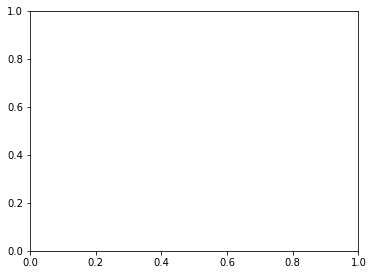

In [7]:

delta_t = 5*10**-4
delta_t2 = 5*10**-4

record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t
simulation_repetitions2 = time_simulated/delta_t2


times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)
times2 = np.arange(1*delta_t2*record_steps, simulation_repetitions2*delta_t2 + delta_t2*record_steps , delta_t2*record_steps)

plt.figure(figsize = (20,15))
for j in range(9):
    plt.subplot(3,3,j+1)
    
    X1_distance = []
    X2_perturbed_distance = []
    X4_perturbed_distance = []
    X6_perturbed_distance = []
    X8_perturbed_distance = []
    X10_perturbed_distance = []
    X12_perturbed_distance = []
    X14_perturbed_distance = []





    for i in range(len(XSprott_control_1_DF["X1"])-1):
        X1_distance.append(norm(XSprott_control_1_DF.iloc[i,j]))
        
    for i in range(len(XSprott_control_1_DF["X1"])-1):
        X2_perturbed_distance.append(norm(XSprott_control_2_DF.iloc[i,j]))
        #X4_perturbed_distance.append(norm(X5_DF.iloc[i,j]))
        #X6_perturbed_distance.append(norm(X7_DF.iloc[i,j]))
        #X8_perturbed_distance.append(norm(X6_DF.iloc[i,j]))
        #X10_perturbed_distance.append(norm(X8_DF.iloc[i,j]))
        #X12_perturbed_distance.append(norm(X9_DF.iloc[i,j]))
        #X14_perturbed_distance.append(norm(X10_DF.iloc[i,j]))




    
    plt.plot(times,X1_distance, label = "Original")
    plt.plot(times2,X2_perturbed_distance, label = "1st Perturbed")
    #plt.plot(times,X4_perturbed_distance, label = "2nd Perturbed")
    #plt.plot(times,X6_perturbed_distance, label = "3rd perturbed")
    #plt.plot(times,X8_perturbed_distance, label = "4th Perturbed")
    #plt.plot(times,X10_perturbed_distance, label = "5th Perturbed")
    #plt.plot(times,X12_perturbed_distance, label = "6th Perturbed")
    #plt.plot(times,X14_perturbed_distance, label = "7th Perturbed")

    plt.legend()
    plt.title(f"L2 norm of position matrix {j}", fontsize = 14)
    plt.ylabel("L2 norm", fontsize = 12)
    plt.xlabel("Time (seconds)", fontsize = 12)


Velocity norms of X_simulation_2

NameError: name 'X1_DF' is not defined

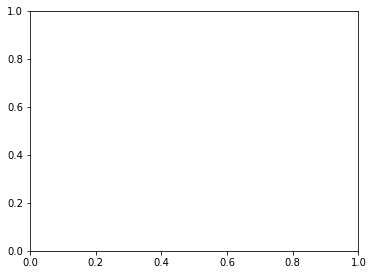

In [26]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

plt.figure(figsize = (20,15))
for j in range(9):
    plt.subplot(3,3,j+1)
    
    X1_distance = []
    X2_perturbed_distance = []
    X4_perturbed_distance = []
    X6_perturbed_distance = []

    for i in range(len(X1_DF["X1"])-1):
        X1_distance.append(norm(X1_DF.iloc[i,j]))
        X2_perturbed_distance.append(norm(X2_DF.iloc[i,j]))
        #X4_perturbed_distance.append(norm(V2_DF.iloc[i,j]))
        #X6_perturbed_distance.append(norm(V5_DF.iloc[i,j]))

    
    plt.plot(times, X1_distance, label = "Original")
    plt.plot(times,X2_perturbed_distance, label = "1st Perturbed")
    #plt.plot(times,X4_perturbed_distance, label = "Perturbed")
    #plt.plot(times,X6_perturbed_distance, label = "3rd perturbed")
    plt.legend()
    plt.title(f"L2 norm of position matrix {j}", fontsize = 14)
    plt.ylabel("L2 norm", fontsize = 12)
    plt.xlabel("Time (seconds)", fontsize = 12)


**Using paper's separation formula**

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


C:\Users\robtk\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Lyapunov exponent graph. H = 0.010539')

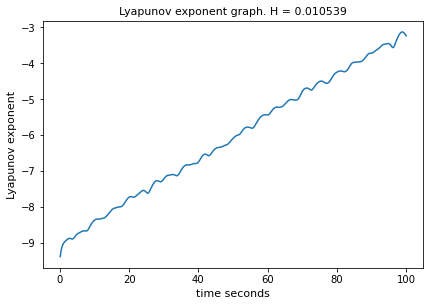

In [59]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

plt.figure(figsize = (15,10))

X1_distance = []
for i in range(len(XSprott_control_1_DF["X1"])-1):
    X1_distance.append(Distance(XSprott_control_1_DF.iloc[i,:], XSprott_control_2_DF.iloc[i,:]))
    
X1_distance = []
for i in range(len(X1_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X1_DF.iloc[i+1,j])-np.array(X2_DF.iloc[i+1,j])

        argument = np.trace( np.matmul(deltaX, deltaX) )


        sumX += argument
    X1_distance.append(np.sqrt(sumX))
plt.subplot(2,2,1)
for el in X1_distance:
    print(el.imag)
    if el.imag != 0:
        print(el)
plt.plot(times, np.log(np.sqrt(X1_distance)))
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Lyapunov exponent graph. H = 0.010539", fontsize = 11)





(1.63019882758177+0j)


C:\Users\robtk\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


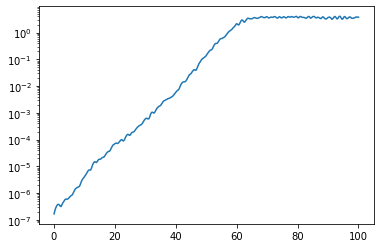

In [14]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

#X1_distance = []
#for i in range(len(XSprott_control_1_DF["X1"])-1):
#    X1_distance.append(Distance(XSprott_control_1_DF.iloc[i,:], XSprott_control_2_DF.iloc[i,:]))
#    
X1_distance = []
for i in range(len(XC1_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(XC1_DF.iloc[i+1,j])-np.array(XC2_DF.iloc[i+1,j])

        argument = np.trace( np.matmul(deltaX, deltaX) )

        sumX += argument
    X1_distance.append((np.sqrt(sumX)))
for el in X1_distance:
    el = el.real

average = (np.sum(X1_distance[75:])/len((X1_distance[75:]))) 
print(average)

plt.plot(times, X1_distance)
plt.yscale("log")

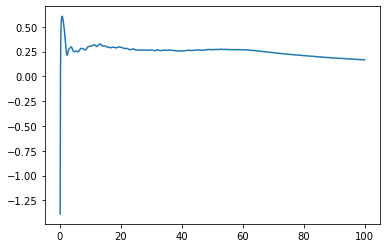

In [18]:

distance_t = np.array(X1_distance)
#distance_t = np.array(X1_distance[105:]).mean()
distance_0 = X1_distance[1]
exponent = []
for el in range(len(times)):
    
    exponent.append(1/times[el] * np.log(np.abs(distance_t[el])/np.abs(distance_0)))




plt.plot(times, exponent)

## Calculate Cillian Lyapunov 4x4

In [191]:
scrambling_time = 70

# Distance between states at scrambling time
distance_t = X1_distance[80]
distance_0 = X1_distance[1]

Lyapunov = 1/scrambling_time * np.log(np.abs(distance_t)/np.abs(distance_0))

print(Lyapunov)

(0.20738435971316505+0j)


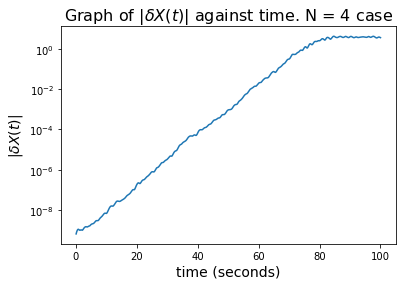

In [8]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

X1_distance = []
for i in range(len(X1_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X1_DF.iloc[i+1,j])-np.array(X2_DF.iloc[i+1,j])

        argument = np.trace( np.matmul(deltaX, deltaX) ).real

        sumX += argument
    X1_distance.append((np.sqrt(sumX)))
for el in X1_distance:
    el = el.real



plt.plot(times, X1_distance)
plt.ylabel("$|\delta X(t)|$", fontsize = 14)
plt.xlabel("time (seconds)", fontsize = 14)
plt.title("Graph of $|\delta X(t)|$ against time. N = 4 case", fontsize = 16)
plt.yscale("log")
plt.savefig("Run 3", dpi = 100)
#plt.ylim(0,1)

In [22]:
len(X1_distance)

1000

In [17]:
scrambling_time = 80

# Distance between states at scrambling time
distance_t = np.mean(X1_distance[800:])
distance_0 = X1_distance[1]

Lyapunov = 1/scrambling_time * np.log(np.abs(distance_t)/np.abs(distance_0))

print(Lyapunov)

0.2787626475667381


Lyapunov 4x4:  0.26706940162699827


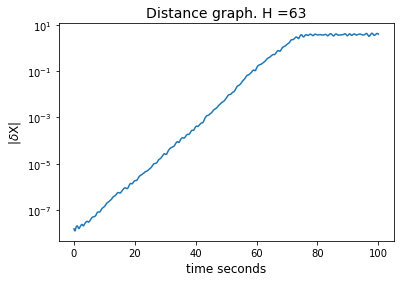

In [36]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

X1_distance = []
for i in range(len(X1_DF["X1"])-1):
    X1_distance.append(Distance(X1_DF.iloc[i+1,:],X2_DF.iloc[i+1,:]))
    

    
average = (np.sum(X1_distance[800:])/len((X1_distance[800:]))) 
    
    
plt.plot(times, ((X1_distance)))
plt.ylabel("|$\delta$X|", fontsize = 12)
plt.xlabel("time seconds", fontsize = 12)
plt.title("Distance graph. H =63", fontsize = 14)
plt.savefig("Run 3", dpi = 100)

scrambling_time = 60

# Distance between states at scrambling time
distance_t = X1_distance[600]
distance_0 = X1_distance[0]

Lyapunov = 1/scrambling_time * np.log(np.abs(distance_t)/np.abs(distance_0))
plt.yscale("log")
print("Lyapunov 4x4: ", Lyapunov)

# N = 4, Sprott

In [413]:
delta_t = 1*10**-3
record_steps = 1000
time_simulated = 50
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)


plt.figure(figsize = (15,10))

X1_distance = []
for i in range(len(XSprott_control_1_DF["X1"])-1):
    X1_distance.append(Distance(XSprott_control_1_DF.iloc[i,:], XSprott_control_2_DF.iloc[i,:]))

plt.subplot(2,2,1)
plt.plot(times, (np.log(X1_distance)))

scrambling_time = 49

# Distance between states at scrambling time
distance_t = X1_distance[49]
print(distance_t)
distance_0 = X1_distance[1]

Lyapunov = 1/scrambling_time * np.log(np.abs(distance_t)/np.abs(distance_0))

print(Lyapunov)

TypeError: unsupported operand type(s) for -: 'list' and 'list'

<Figure size 1080x720 with 0 Axes>

Leading Lyapunov exponent

2.549399334294437
0.12119285921692663


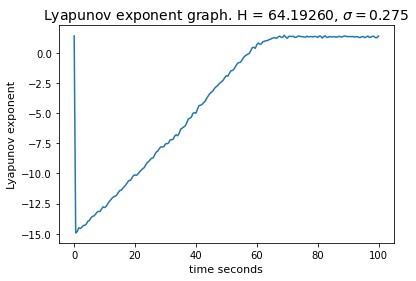

In [45]:
times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

X1_distance = []
for i in range(len(XSprott_control_1_DF["X1"])):
    X1_distance.append(Distance(XSprott_control_1_DF.iloc[i,:], XSprott_control_2_DF.iloc[i,:]))
    

for el in X1_distance:
    el = el.real

average = (np.sum(X1_distance[80:])/len((X1_distance[80:]))) 
print(average)

plt.plot(times, np.log(X1_distance))
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Lyapunov exponent graph. H = 64.19260, $\sigma = 0.275$", fontsize = 14)
plt.savefig("Run 3", dpi = 100)
#plt.ylim(0,1)

scrambling_time = 60

# Distance between states at scrambling time
distance_t = X1_distance[60]
distance_0 = X1_distance[2]

Lyapunov = 1/scrambling_time * np.log(np.abs(distance_t)/np.abs(distance_0))

print(Lyapunov)

# N = 4, H = 630

In [1]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t
times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

X63_distance = []
for i in range(len(X1_DF["X1"])-2):
    X63_distance.append(Distance(X1_DF.iloc[i+1,:], X2_DF.iloc[i+1,:]))

X1_distance = []
for i in range(len(X1_630_DF["X1"])-2):
    X1_distance.append(Distance(X1_630_DF.iloc[i+1,:], X2_630_DF.iloc[i+1,:]))
    
plt.plot(times[:720], np.log((X1_distance[:720])))    
plt.plot(times[:999], np.log((X63_distance)))    
plt.title("N = 9, H = 62.9934. T = 1");

scrambling_time = 45

# Distance between states at scrambling time
distance_t = X1_distance[scrambling_time*10]
distance_0 = X1_distance[2]

Lyapunov = 1/scrambling_time * np.log(np.abs(distance_t)/np.abs(distance_0))
print(Lyapunov)

NameError: name 'np' is not defined

## N = 7 case Lyapunov exponent


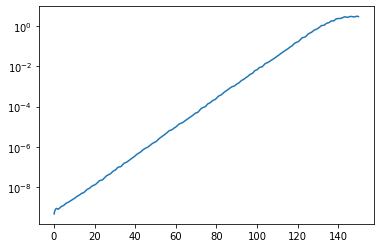

In [9]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 150
simulation_repetitions = time_simulated/delta_t
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

X1_distance = []
for i in range(len(X71_DF["X1"])-1):
    X1_distance.append(Distance(X71_DF.iloc[i+1,:], X72_DF.iloc[i+1,:]))
    

for el in X1_distance:
    el = el.real

average = (np.sum(X1_distance[96:])/len((X1_distance[96:]))) 
    
plt.plot(times, ((X1_distance)))    
plt.yscale("log")


In [85]:
scrambling_time = 80
# Distance between states at scrambling time
distance_t = np.mean(X1_distance[80:]).real
distance_0 = X1_distance[1].real
Lyapunov = 1/scrambling_time * np.log(np.abs(distance_t)/np.abs(distance_0))

print("Lyapunov: ", Lyapunov)

Lyapunov:  0.18793067720423728


# N = 9 case Lyapunov Exponent

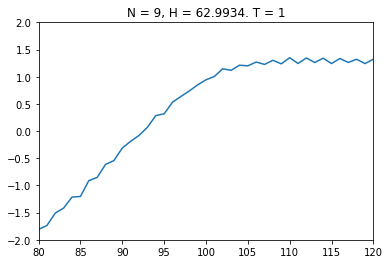

In [82]:
delta_t = 1*10**-3
record_steps = 1000
time_simulated = 126
simulation_repetitions = time_simulated/delta_t
times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

X1_distance = []
for i in range(len(X91_DF["X1"])-2):
    X1_distance.append(Distance(X91_DF.iloc[i+1,:], X92_DF.iloc[i+1,:]))

average = (np.sum(X1_distance[96:])/len((X1_distance[96:]))) 
    
plt.plot(times, np.log((X1_distance)))   
plt.xlim(80,120)
plt.ylim(-2,2)
plt.title("N = 9, H = 62.9934. T = 1");

In [64]:
# Find scrambling time
tolerance = np.mean(X1_distance[105:])

np.where(np.isclose(X1_distance, tolerance, atol = 1e-1))


(array([106, 108, 113, 117, 124], dtype=int64),)

<ipython-input-110-8810e9232b63>:7: RuntimeWarning: divide by zero encountered in double_scalars
  exponent.append(1/times[el] * np.log(np.abs(distance_t[el])/np.abs(distance_0)))


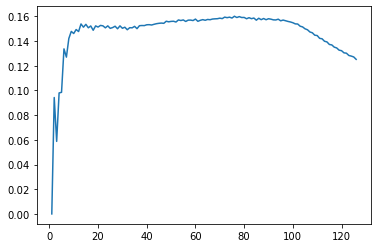

In [110]:

distance_t = np.array(X1_distance)
#distance_t = np.array(X1_distance[105:]).mean()
distance_0 = X1_distance[1]
exponent = []
for el in range(len(times)):
    
    exponent.append(1/times[el] * np.log(np.abs(distance_t[el])/np.abs(distance_0)))




plt.plot(times, exponent)

In [49]:
scrambling_time = np.arange(0, len(X1_distance), 1)

# Distance between states at scrambling time
distance_0 = X1_distance[0]

Lyapunov_exponent = -10

for time in np.arange(1, len(X1_distance), 1):
    distance_t = X1_distance[time-1]
    
    exponent = 1/time * np.log(np.abs(distance_t)/np.abs(distance_0))
    
    if exponent > Lyapunov_exponent:
        Lyapunov_exponent = exponent
        scrambling_time = time


print(Lyapunov_exponent)
scrambling_time

0.15830678118849725


77

In [41]:
np.log(X1_distance/X1_distance[0])

array([ 0.        ,  0.02871772,  0.21716274,  0.20480704,  0.42042623,
        0.52085796,  0.83032282,  0.91713111,  1.16479694,  1.3583308 ,
        1.48909457,  1.67043356,  1.80034421,  2.02764795,  2.14497009,
        2.33048665,  2.43942126,  2.61504775,  2.70442288,  2.92051682,
        3.05376104,  3.23299055,  3.37809756,  3.49324598,  3.68225091,
        3.78409006,  3.95082565,  4.13089588,  4.22522902,  4.44308988,
        4.5369283 ,  4.71388775,  4.79947378,  5.00316939,  5.15021852,
        5.34242975,  5.4273318 ,  5.66583462,  5.82376383,  5.97384413,
        6.15290145,  6.30975203,  6.45142779,  6.62919807,  6.80404207,
        6.97171842,  7.13497102,  7.27964482,  7.51557256,  7.64808985,
        7.82098409,  7.98231169,  8.10568375,  8.35067545,  8.48263152,
        8.66561773,  8.75221214,  8.96891728,  9.12890424,  9.26383709,
        9.49117127,  9.53871019,  9.74554076,  9.93624166, 10.06071898,
       10.2604517 , 10.40371851, 10.59775091, 10.7666697 , 10.93

# Sprott

In [89]:
def Lyapunov_sprott(dt, X_original_sprott, X_perturbed_sprott):
    n = len(X_original_sprott)
    
    D_0 = Distance(X_original_sprott.iloc[1, :], X_perturbed_sprott.iloc[1, :])
    
    summation = 0
    for i in range(n-1):
        summation += np.log(Distance(X_original_sprott.iloc[i+1, :], X_perturbed_sprott.iloc[i+1, :])/ D_0)
    
    return 1/(n*dt) * summation

In [90]:
Lyapunov_sprott(5e-4, XSprott_1_DF, XSprott_2_DF)

NameError: name 'XSprott_1_DF' is not defined

# Fast scrambler Plot

1.5667628574580408e-08


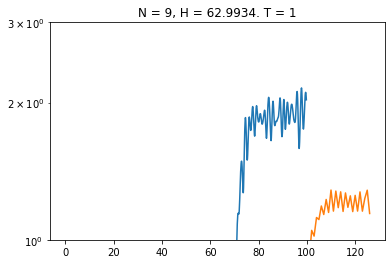

In [62]:
delta_t = 1*10**-4
record_steps = 1000
seconds_simulated = 100
simulation_repetitions = seconds_simulated / delta_t
TimesForNis4 = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)


delta_t = 1*10**-4
record_steps = 1000
seconds_simulated = 100
simulation_repetitions = seconds_simulated / delta_t
TimesForNis7 = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)



delta_t = 1*10**-3
record_steps = 1000
time_simulated = 128
simulation_repetitions = time_simulated/delta_t
TimesForNis9 = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

XNis4_distance = []
for i in range(len(X1_DF["X1"])-2):
    XNis4_distance.append(Distance(X1_DF.iloc[i+1,:], X2_DF.iloc[i+1,:]))

#XNis7_distance = []
#for i in range(len(X71_DF["X1"])-2):
#    XNis7_distance.append(Distance(X71_DF.iloc[i+1,:], X72_DF.iloc[i+1,:]))
    
XNis9_distance = []
for i in range(len(X91_DF["X1"])-2):
    XNis9_distance.append(Distance(X91_DF.iloc[i+1,:], X92_DF.iloc[i+1,:]))
print(XNis4_distance[0])
plt.plot(TimesForNis4[:999], ((XNis4_distance)/np.sqrt(4)))  
#plt.plot(TimesForNis7, np.log((XNis7_distance/np.sqrt(7))))    
plt.plot(TimesForNis9[:127], ((XNis9_distance)/np.sqrt(9)))   
plt.yscale("log")
plt.ylim(1,3)
plt.title("N = 9, H = 62.9934. T = 1");

In [405]:
print(len(X7_522_error_DF))
print(len(X7_522_original_DF))

301
1501


In [406]:
X7_522_error_DF

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0.0,"[[(0.220971786851635+0j), (0.306537298781813-0...","[[(-0.054541975935058+0j), (0.092353116061063-...","[[(0.152826603725198+0j), (0.1433811867957+0.2...","[[(-0.35294738021871+0j), (-0.09508002081074-0...","[[(0.140450245514362+0j), (0.053600958788562-0...","[[(0.168979691580506+0j), (-0.002543494423227+...","[[(-0.35410557604972+0j), (0.007840643294179+0...","[[(-0.069463377204154+0j), (-0.048432648219887...","[[(0.128874451444506+0j), (0.048323851990227+0..."
0.5,"[[(-0.215988594772237+0j), (-0.271457191512607...","[[(-0.243501427319041+0j), (0.010375721581827+...","[[(-0.167020853863005+0j), (-0.007170385198292...","[[(0.216788509639325+0j), (0.032832969302662+0...","[[(-0.089575476116385+0j), (-0.098916510367444...","[[(-0.265007156120495+0j), (0.04145723923718-0...","[[(0.103730265437881+0j), (0.107581758163754+0...","[[(-0.203127851036758+0j), (0.160864949260441-...","[[(-0.347030742316583+0j), (-0.082337350390075..."
1.0,"[[(-0.217114312917169+0j), (-0.185176997248219...","[[(0.22810309949173+0j), (0.095927470378231+0....","[[(-0.147634734174772+0j), (-0.271315860983795...","[[(0.235716158730763+0j), (0.063293110080538+0...","[[(-0.107495056300929+0j), (-0.078215673494498...","[[(-0.054207520662054+0j), (-0.057222266469044...","[[(0.37892498765164+0j), (0.091146056115011-0....","[[(0.003668059121044+0j), (-0.098970074850177+...","[[(-0.290533864569591+0j), (-0.144124970773457..."
1.5,"[[(0.052883269848896+0j), (0.092735606802269-0...","[[(0.454265125341376+0j), (0.073398192803839+0...","[[(-0.09838650264628+0j), (-0.229005884701519+...","[[(-0.087254337434954+0j), (-0.010127984596356...","[[(-0.004479808743175+0j), (0.002195397266256+...","[[(0.165809450357838+0j), (-0.063624915076203-...","[[(0.19865495684935+0j), (0.017039281690486-0....","[[(0.206188930480245+0j), (-0.214822484441893+...","[[(0.095721537166153+0j), (-0.085485588653211-..."
2.0,"[[(0.276725687383647+0j), (0.227071433286521-0...","[[(0.167630993086944+0j), (-0.124076558071163-...","[[(-0.025599339049875+0j), (0.07158503856536+0...","[[(-0.324484619352179+0j), (-0.058846902518663...","[[(0.008089214312098+0j), (0.112058465214688+0...","[[(0.215345281864246+0j), (-0.013402636273652+...","[[(-0.219742504892453+0j), (-0.088857101730582...","[[(0.259018947179636+0j), (-0.065832177363191+...","[[(0.457764284861937+0j), (0.103035265456076-0..."
...,...,...,...,...,...,...,...,...,...
148.0,"[[(0.328440789581442+0j), (0.266658064940487+0...","[[(-0.231576066715903+0j), (-0.222081737768445...","[[(-0.117655529506386+0j), (-0.071149390149723...","[[(0.059123400693262+0j), (0.122827934837807-0...","[[(0.077958225073907+0j), (-0.006394474305357-...","[[(-0.122211572574946+0j), (-0.088011571748013...","[[(-0.294619223807116+0j), (0.045123224560012+...","[[(0.132011008694855+0j), (0.281870342262082+0...","[[(0.366838861873114+0j), (-0.025575045636193-..."
148.5,"[[(-0.006384559352804+0j), (-0.108348705346268...","[[(-0.2526316702483+0j), (-0.132944249240692+0...","[[(-0.005375941067373+0j), (0.109820717601534+...","[[(0.039920610344768+0j), (-0.022938405490314-...","[[(0.242090047232472+0j), (-0.014804299514339-...","[[(-0.049278879459488+0j), (0.040120879127329-...","[[(-0.195439491099947+0j), (0.010535488766556+...","[[(-0.154232667670057+0j), (-0.039049734070012...","[[(0.486726586703554+0j), (-0.064776968060109-..."
149.0,"[[(-0.265903053090649+0j), (-0.454731430606083...","[[(0.11090235051534+0j), (0.069642836655628+0....","[[(0.128965425546979+0j), (0.097022226654855+0...","[[(0.015340832010808+0j), (-0.207751909789999+...","[[(0.182300796385759+0j), (-0.03141064920913-0...","[[(0.066834638250411+0j), (0.191174166739938+0...","[[(0.118156531802427+0j), (0.064896066405818-0...","[[(-0.327353909469079+0j), (-0.329176859490155...","[[(0.016871077558711+0j), (0.03642619344616-0...."
149.5,"[[(-0.216261283317421+0j), (-0.341295019685687...","[[(0.47940883720019+0j), (0.214661366665585-0....","[[(0.181143755026317+0j), (-0.020638818

# Test timestep 1e-4 vs 5e-4


In [59]:
delta_t = 8*10**-5
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t

times2 = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t , delta_t*record_steps)
print(times2)


[8.000e-02 1.600e-01 2.400e-01 ... 9.984e+01 9.992e+01 1.000e+02]


In [67]:
X4_1260_error0_original_DF

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0.0,"[[(0.020938078461535+0j), (0.03083294442793+0....","[[(0.22879966446587+0j), (0.442986762092678+0....","[[(0.118523022468561+0j), (-0.058391891557794+...","[[(0.213927242502767+0j), (-0.195917081726539+...","[[(0.642357995403572+0j), (0.365121484397468+0...","[[(0.461366989893901+0j), (-0.591254240434293-...","[[(-0.031541569112293+0j), (0.061906227401474-...","[[(-0.107850121214488+0j), (0.052273626918446+...","[[(-0.373605865746663+0j), (-0.056839117453895..."
0.1,"[[(-0.265202893962185+0j), (-0.119886412091094...","[[(-0.077770425917956+0j), (-0.463790425040199...","[[(0.102180532917325+0j), (0.155045373393034+0...","[[(-0.092034702182684+0j), (0.29999258938407-0...","[[(-0.28274901915435+0j), (-0.193362323218437-...","[[(-0.821174599456785+0j), (0.342938864704794+...","[[(0.701723163967969+0j), (-0.496391865113805-...","[[(-0.169826047059637+0j), (-0.05902197735363-...","[[(-0.106989470311315+0j), (-0.252782330517997..."
0.2,"[[(-0.271832698195333+0j), (-0.200529673321373...","[[(0.026026972558642+0j), (-0.360358457890007+...","[[(0.198439213984782+0j), (0.199426734747762+0...","[[(0.069926514455189+0j), (0.386694679232926-0...","[[(-0.037959066405408+0j), (-0.033994937017354...","[[(-0.751254556326155+0j), (0.133333681382712+...","[[(0.661600750375568+0j), (-0.673105191359071-...","[[(-0.317682594472538+0j), (-0.12560841947946-...","[[(-0.223210316103311+0j), (-0.497522788695519..."
0.3,"[[(-0.250824751183832+0j), (-0.251104322083005...","[[(0.136171865821183+0j), (-0.192397262550032+...","[[(0.272042744063929+0j), (0.228074004090909+0...","[[(0.197796691921104+0j), (0.424249867386864-0...","[[(0.195884301719663+0j), (0.106865150740591+0...","[[(-0.553925483238852+0j), (-0.057939100095125...","[[(0.539751652083231+0j), (-0.74386240798542-0...","[[(-0.4040256519821+0j), (-0.17123113115064-0....","[[(-0.293429839739555+0j), (-0.649739057310487..."
0.4,"[[(-0.208578796159318+0j), (-0.267976059344546...","[[(0.242971343091537+0j), (0.025673884178387+0...","[[(0.318500323214458+0j), (0.230135172485523+0...","[[(0.264654587712766+0j), (0.381359883264831+0...","[[(0.392648735485153+0j), (0.218721740125023+0...","[[(-0.264478211572002+0j), (-0.202395506401378...","[[(0.359661256485637+0j), (-0.703744175769895-...","[[(-0.438879046685224+0j), (-0.190141444376568...","[[(-0.31516686431118+0j), (-0.713308697852832+..."
...,...,...,...,...,...,...,...,...,...
99.6,"[[(0.808697353785652+0j), (0.024967758127816-0...","[[(0.433592768808073+0j), (0.093846123039519+0...","[[(-0.799632631319923+0j), (-0.606354624216458...","[[(-0.279642085349154+0j), (-0.238412461193431...","[[(0.599363368204178+0j), (0.230954717971033-0...","[[(-0.199733952288963+0j), (-0.275926657393288...","[[(0.842554333326008+0j), (0.11123718131585+0....","[[(-0.523082584779861+0j), (0.042951961568294+...","[[(0.026257790021988+0j), (-0.346315832008322+..."
99.7,"[[(0.682447262420258+0j), (0.202450569969628-0...","[[(0.596554280414051+0j), (-0.083518923314202+...","[[(-1.035523626161703+0j), (-0.611212506578748...","[[(-0.377684542889571+0j), (-0.430189516761245...","[[(0.535473945502284+0j), (0.055326627460357-0...","[[(-0.275227842853802+0j), (-0.161534573397535...","[[(0.788512291222934+0j), (0.001290562838683+0...","[[(-0.53677493015994+0j), (-0.145338715172603+...","[[(-0.071346819833904+0j), (-0.471430825051925..."
99.8,"[[(0.499788425351524+0j), (0.380767297754371+0...","[[(0.698681426103799+0j), (-0.205475586449972+...","[[(-1.191870116188808+0j), (-0.524778101080322...","[[(-0.454895804522612+0j), (-0.527818522810565...","[[(0.424523585699122+0j), (-0.120936046724243-...","[[(-0.335912439664927+0j), (-0.059333357775511...","[[(0.656242484527188+0j), (-0.103102425694447-...","[[(-0.504309531552561+0j), (-0.342431184653413...","[[(-0.161537446912782+0j), (-0.525541689688293..."
99.9,"[[(0.276058579843603+0j), (0.529336362334369+0...","[[(0.729175248066861+0j), (-0.2364898509712+0....","[[(-1.23084163515127+0j), (-0.3619274218125

In [65]:
first = 0.08
second = "X1"
X4_1260_error1_original_DF.loc[first , second]
X4_1260_error0_original_DF.loc[first , second]

KeyError: 0.08

In [68]:
for i in range(len(X4_1260_error1_original_DF["X1"])-1):
    if times2[i] % 0.1 == 0:
        if j == 1:
            recording_times.append(times2[i])
        print(times2[i])
        X4_1260_error1_original_DF.loc[times2[i], DF_labels[j]]
        X4_1260_error0_original_DF.loc[times2[i], DF_labels[j]]
    

0.4
1.6
3.2
6.4
12.8
51.2


[0.4, 1.6, 3.2, 6.4, 12.8, 51.2]
[0.4, 1.6, 3.2, 6.4, 12.8, 51.2]
[0.4, 1.6, 3.2, 6.4, 12.8, 51.2]
[0.4, 1.6, 3.2, 6.4, 12.8, 51.2]
[0.4, 1.6, 3.2, 6.4, 12.8, 51.2]
[0.4, 1.6, 3.2, 6.4, 12.8, 51.2]
[0.4, 1.6, 3.2, 6.4, 12.8, 51.2]
[0.4, 1.6, 3.2, 6.4, 12.8, 51.2]
[0.4, 1.6, 3.2, 6.4, 12.8, 51.2]


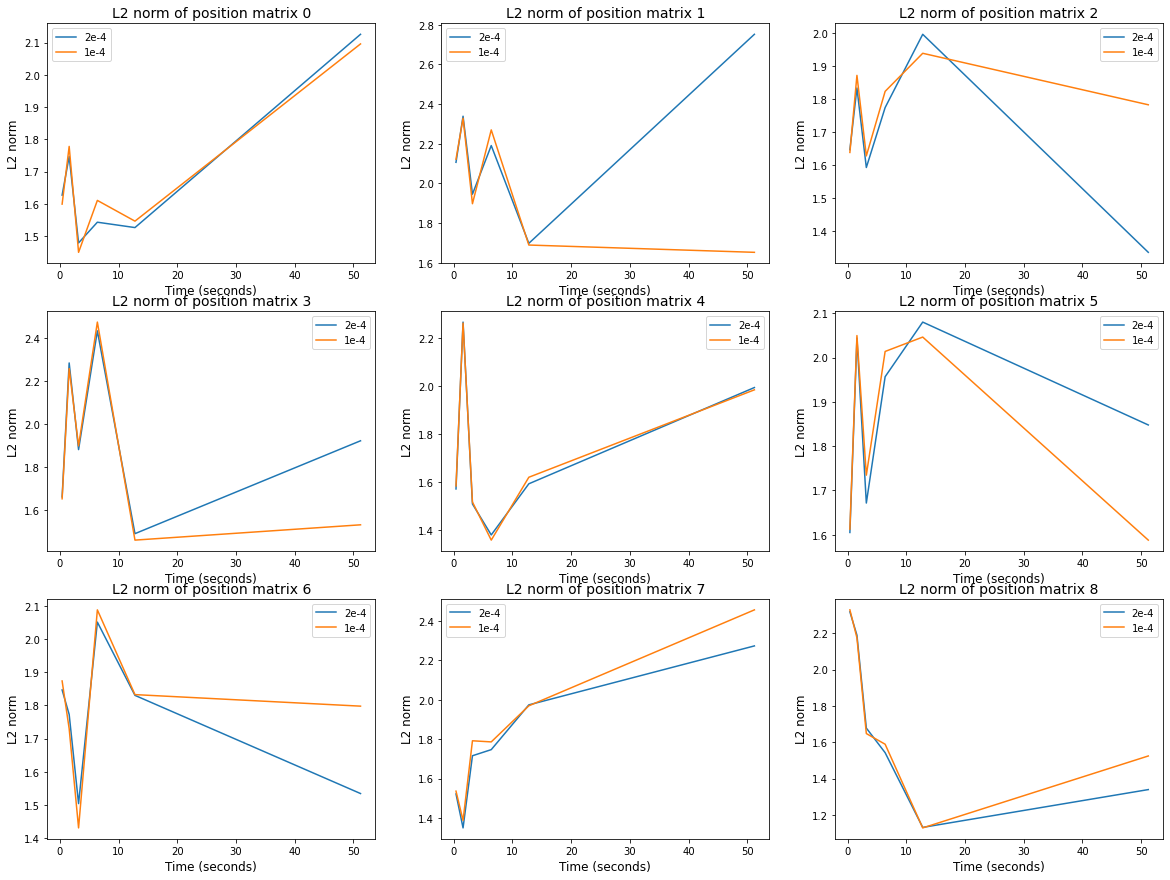

In [73]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)
DF_labels = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]
plt.figure(figsize = (20,15))
recording_times = []
for j in range(9):
    plt.subplot(3,3,j+1)
    
    X1_distance = []
    X2_distance = []

    for i in range(len(X4_1260_error1_original_DF["X1"])-1):
        if times2[i] % 0.1 == 0:
            if j == 0:
                recording_times.append(times2[i])
            X1_distance.append(norm(X4_1260_error1_original_DF.loc[times2[i], DF_labels[j]]))
            X2_distance.append(norm(X4_1260_error0_original_DF.loc[times2[i], DF_labels[j]]))
    print(recording_times)
    plt.plot(recording_times, X1_distance[:], label = "2e-4")
    plt.plot(recording_times,X2_distance[:], label = "1e-4")
    plt.legend()
    plt.title(f"L2 norm of position matrix {j}", fontsize = 14)
    plt.ylabel("L2 norm", fontsize = 12)
    plt.xlabel("Time (seconds)", fontsize = 12)

In [23]:
100/8e-5

1250000.0

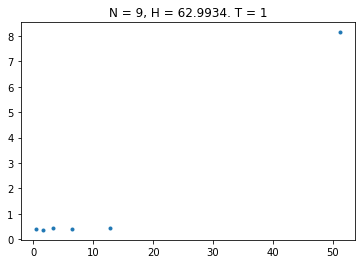

In [78]:


delta_t = 1*10**-4
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t
TimesForffastOriginal = np.arange(0, simulation_repetitions*delta_t , delta_t*record_steps)

X_1_distance = []
for i in range(len(X4_1260_error1_original_DF["X1"])-1):
    if times2[i] % 0.1 == 0:
        X_1_distance.append(Distance((X4_1260_error1_original_DF.loc[times2[i]]),
                                     (X4_1260_error0_original_DF.loc[times2[i]])))

plt.plot(recording_times, (X_1_distance), ".")
plt.title("N = 9, H = 62.9934. T = 1");


In [140]:
X1_630ffast_DF

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0.0,"[[(-0.627851821394008+0j), (0.167323148404089+...","[[(0.330666386940061+0j), (0.27514663956096+0....","[[(-0.247209455508487+0j), (0.098032243020074+...","[[(0.218575953879626+0j), (0.007786239764452-0...","[[(0.006972068145962+0j), (-0.447978314790126-...","[[(-0.266430842139269+0j), (0.134159879696154+...","[[(0.311253202165539+0j), (0.366486553231706-0...","[[(-0.023122534967051+0j), (0.297030047503343-...","[[(-0.123387524367877+0j), (-0.171166121664076..."
0.1,"[[(0.322990880876598-0j), (-0.412845370096447-...","[[(-0.33910035722186+0j), (-0.210186153445698-...","[[(0.237889297626204-0j), (0.066634402502734-0...","[[(-0.549581012622455+0j), (-0.25450431410385-...","[[(-0.054668494381144+0j), (0.03377986791033+0...","[[(-0.048643803852661-0j), (-0.144331866294273...","[[(-0.02702599289593+0j), (-0.028544508467864+...","[[(0.118505295099833-0j), (-0.382769174001944+...","[[(0.124229086886073+0j), (0.143519507471762-0..."
0.2,"[[(0.599481315571119-0j), (-0.260623128909798-...","[[(-0.127714304201042+0j), (-0.171338522581076...","[[(0.30849847490824-0j), (-0.051760433937309-0...","[[(-0.595589452357827+0j), (-0.082178062800283...","[[(-0.020567662482697+0j), (0.242149984017013+...","[[(0.019911816088441-0j), (-0.189068418769409+...","[[(0.037353257572692+0j), (-0.00051466404197+0...","[[(0.134121099501964-0j), (-0.356463437243285+...","[[(0.064176069321529+0j), (0.228747850360519-0..."
0.3,"[[(0.825093604139934-0j), (-0.075611633929399-...","[[(0.091814208707567+0j), (-0.123816484443912+...","[[(0.378020362766448-0j), (-0.170858459185126-...","[[(-0.612546963016395+0j), (0.110407263420491-...","[[(0.014721085461202+0j), (0.428487846475952+0...","[[(0.083066970918272-0j), (-0.213123522088278+...","[[(0.093486014383345+0j), (0.030227589382169+0...","[[(0.143893612801223-0j), (-0.303760827675529+...","[[(0.00768665923459+0j), (0.295288901842289-0...."
0.4,"[[(0.992294138726999-0j), (0.131269370779576-0...","[[(0.307885447086798+0j), (-0.069527054880427+...","[[(0.438367279099144-0j), (-0.283252039248124-...","[[(-0.592644127841432-0j), (0.301403447677003-...","[[(0.052080390564322+0j), (0.574591975063898+0...","[[(0.14410291509139-0j), (-0.209978241212513+0...","[[(0.142890528408815+0j), (0.046964819517648+0...","[[(0.150023465888416-0j), (-0.235395951883925-...","[[(-0.04709479508934+0j), (0.341829757459798-0..."
...,...,...,...,...,...,...,...,...,...
74.1,"[[(-0.044159886189688+0.32185724226875j), (-0....","[[(-0.266437214847182+0.15395672181598j), (-0....","[[(-0.028396779067818+0.422647154163013j), (-1...","[[(-0.071467482607794+0.353121763123831j), (1....","[[(0.660225574608352+0.044633790113372j), (0.4...","[[(0.174634409415632+0.092713769648995j), (-1....","[[(0.047710750983734-0.012896981942705j), (-1....","[[(0.188811495678694-0.160549914996269j), (0.1...","[[(-0.442478449107738-0.274901294358754j), (0...."
74.2,"[[(1.191675057379906-0.187950326309848j), (-1....","[[(-0.279757423852265-0.06777329325276j), (-1....","[[(1.125195372551214-0.088881119314499j), (-1....","[[(0.031477647806247+0.555742606330853j), (2.3...","[[(0.156714408142492+0.248575787349695j), (1.2...","[[(0.373500060712323-0.098008002297351j), (-1....","[[(-0.421808923882902+0.235286877886775j), (-1...","[[(-0.685593161774968+0.292015979429118j), (-0...","[[(-0.571455900316307-0.059157122938928j), (-0..."
74.3,"[[(1.558599199280106-2.99600510049367j), (1.20...","[[(-0.954809556832334-0.818853755203962j), (-1...","[[(1.664001767628586-1.895422341940102j), (2.1...","[[(0.684444586572634+0.956075838119804j), (1.1...","[[(-0.946182629375082+1.071845686080702j), (3....","[[(1.226471452706415-1.245290955795009j), (-2....","[[(-0.319256203248302+0.535298222483242j), (-2...","[[(-0.13040461329358+2.063568062920028j), (-1....","[[(-0.949081858391678-0.106759861453539j), (-0..."
74.4,"[[(-1.4454596501832-8.172964424867349j), (5.86...","[[(-3.51874058491092-1.139959329901346j), (0.3...","[[(2.290521803878423-4.776126644539749j), (

# N = 4 Energy graph

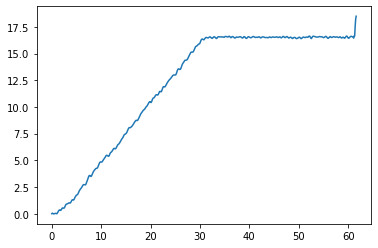

In [140]:
X1_distance = []
for i in range(len(X4_1260_original_DF)-1):
    if i < len(X4_1260_perturbed_DF)-1:
        X1_distance.append(Distance(X4_1260_original_DF.iloc[i+1,:], X4_1260_perturbed_DF.iloc[i+1,:]))


        for el in X1_distance:
            el = el.real

simulation_repetitions = 61.7/delta_t
times = np.arange(0, simulation_repetitions*delta_t , delta_t*record_steps)
plt.plot(times, np.log((X1_distance)/X1_distance[0]), label = labels[j])    

In [153]:
for i in range(len(X4_63_original_DF)-1):
    if i < 6-1:
        print(i)

0
1
2
3
4


In [259]:
Distance(X4_1890_original_DF.iloc[3, :], X4_1890_perturbed_DF.iloc[3, :])

7.6909605602273

0.2853347720956436 0.0001978033729440525
None
0.33302664067486715 0.0004625023168023831
None
0.39680525342549466 0.00019952388224778845
None


<ipython-input-5-dae1cb8a1087>:18: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sumX)


0.4572278567082452 0.0008599217620561661
None
0.5189038103346362 0.0010439261135618042
None
0.6185540111850856 0.0019401216982479596
None


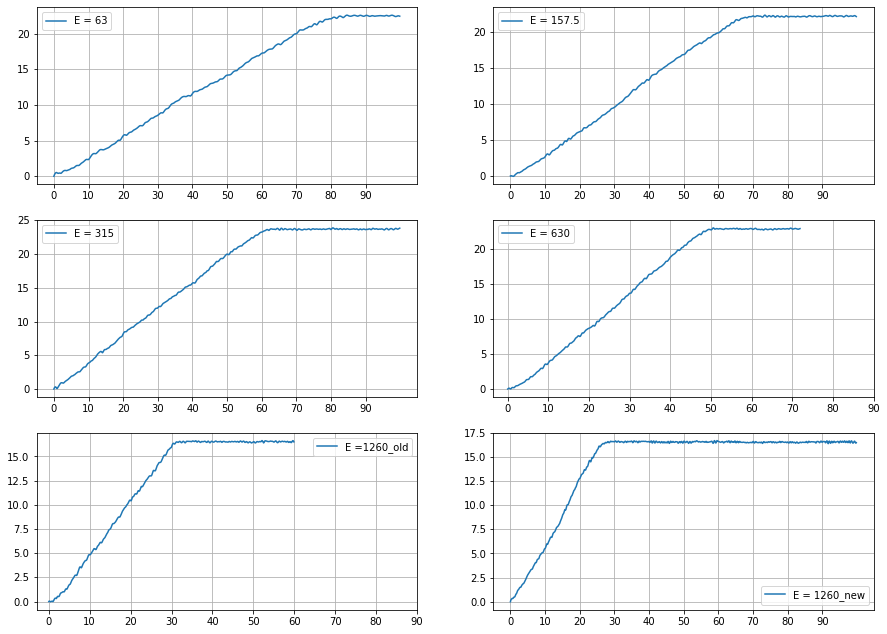

In [56]:
plt.figure(figsize=(15,15))
Nis4_dataframes = [X4_63_original_DF, X4_63_perturbed_DF, 
                   X4_157_5_original_DF, X4_157_5_perturbed_DF, 
                   X4_315_original_DF, X4_315_perturbed_DF,
                   X4_630_original_DF, X4_630_perturbed_DF,
                   X4_1260_old_original_DF, X4_1260_old_perturbed_DF,
                   X4_1890_original_DF, X4_1890_perturbed_DF]

delta_t = 1*10**-4
record_steps = 1000
time_simulated = [100, 100, 100, 74.1, 61.7,  100]
graphing_end = [1000, 1000, 1000, 720, 600, 1000]
labels = ["E = 63", "E = 157.5", "E = 315", "E = 630", "E =1260_old", "E = 1260_new", "E = 1890"]
scrambling_times = [70, 60, 55, 45, 28, 25]

slope_errors = []

for j in range(int(len(Nis4_dataframes)/2)):
    plt.subplot(4,2,j+1)
    simulation_repetitions = time_simulated[j]/delta_t
    times = np.arange(0, simulation_repetitions*delta_t-delta_t*record_steps , delta_t*record_steps)
    X1_distance = []
    for i in range(len(Nis4_dataframes[2*j])-1):
        if i < len(Nis4_dataframes[2*j+1])-2:
            X1_distance.append(Distance(Nis4_dataframes[2*j].iloc[i+1,:], Nis4_dataframes[2*j+1].iloc[i+1,:]))


            for el in X1_distance:
                el = el.real

    plt.plot(times[:graphing_end[j]], np.log((X1_distance)/X1_distance[0])[:graphing_end[j]], label = labels[j])    
    start = 100
    pars1, cov1 = curve_fit(fitfunc, times[start:scrambling_times[j]*10],  
                            np.log((X1_distance)/X1_distance[0])[start:scrambling_times[j]*10])
    slope_errors.append(np.sqrt(cov1[0][0]))
    
    print(print(pars1[0], np.sqrt(cov1[0][0])))
    plt.xticks(np.arange(0,100,10))
    plt.grid(True)
    plt.legend()




In [57]:
slope_errors

[0.0001978033729440525,
 0.0004625023168023831,
 0.00019952388224778845,
 0.0008599217620561661,
 0.0010439261135618042,
 0.0019401216982479596]

<ipython-input-4-dae1cb8a1087>:18: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sumX)


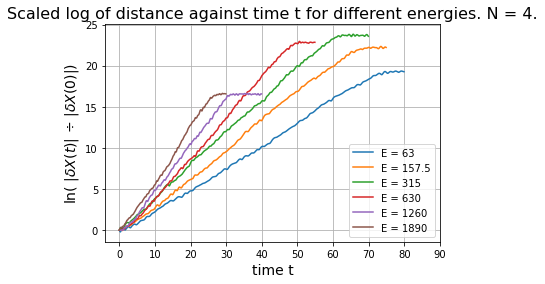

In [341]:
Nis4_dataframes = [X4_63_original_DF, X4_63_perturbed_DF, 
                   X4_157_5_original_DF, X4_157_5_perturbed_DF, 
                   X4_315_original_DF, X4_315_perturbed_DF,
                   X4_630_original_DF, X4_630_perturbed_DF,
                   X4_1260_old_original_DF, X4_1260_old_perturbed_DF,
                   X4_1890_original_DF, X4_1890_perturbed_DF]

delta_t = 1*10**-4
record_steps = 1000
time_simulated = [100, 100, 100, 74.1, 61.7, 100]
graphing_end = [800, 750, 700, 550,  400, 300]
labels = ["E = 63", "E = 157.5", "E = 315", "E = 630",  "E = 1260", "E = 1890"]
scrambling_times = [70, 60, 55, 45, 28, 25]
for j in range(int(len(Nis4_dataframes)/2)):
    simulation_repetitions = time_simulated[j]/delta_t
    times = np.arange(0, simulation_repetitions*delta_t-delta_t*record_steps , delta_t*record_steps)
    X1_distance = []
    for i in range(len(Nis4_dataframes[2*j])-1):
        if i < len(Nis4_dataframes[2*j+1])-2:
            X1_distance.append(Distance(Nis4_dataframes[2*j].iloc[i+1,:], Nis4_dataframes[2*j+1].iloc[i+1,:]))


            for el in X1_distance:
                el = el.real

    plt.plot(times[:graphing_end[j]], np.log((X1_distance)/X1_distance[0])[:graphing_end[j]], label = labels[j])    
    start = 100
   
    plt.xticks(np.arange(0,100,10))
    plt.grid(True)
    plt.legend()

plt.title("Scaled log of distance against time t for different energies. N = 4.", fontsize = 16)
plt.xlabel("time t", fontsize = 14)
plt.ylabel("ln( |$\delta X(t)$| $\div$ |$\delta X(0)$|)", fontsize = 14)

plt.savefig("Scaled distances N = 4.", dpi = 100, bbox_inches = "tight")

<ipython-input-4-dae1cb8a1087>:18: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(sumX)


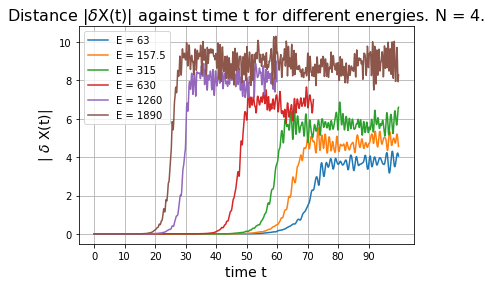

In [387]:
Nis4_dataframes = [X4_63_original_DF, X4_63_perturbed_DF, 
                   X4_157_5_original_DF, X4_157_5_perturbed_DF, 
                   X4_315_original_DF, X4_315_perturbed_DF,
                   X4_630_original_DF, X4_630_perturbed_DF,
                   X4_1260_old_original_DF, X4_1260_old_perturbed_DF,
                   X4_1890_original_DF, X4_1890_perturbed_DF]

delta_t = 1*10**-4
record_steps = 1000
time_simulated = [100, 100, 100, 74.1,61.7, 100]
graphing_end = [1000, 1000, 1000, 720, 600, 1000]
max_delta_x_start = [800, 750, 700, 550,  400, 300]
labels = ["E = 63", "E = 157.5", "E = 315", "E = 630",  "E = 1260", "E = 1890"]
scrambling_times = [70, 60, 55, 45, 30, 28, 25]
for j in range(int(len(Nis4_dataframes)/2)):
    simulation_repetitions = time_simulated[j]/delta_t
    times = np.arange(0, simulation_repetitions*delta_t-delta_t*record_steps , delta_t*record_steps)
    X1_distance = []
    for i in range(len(Nis4_dataframes[2*j])-1):
        if i < len(Nis4_dataframes[2*j+1])-2:
            X1_distance.append(Distance(Nis4_dataframes[2*j].iloc[i+1,:], Nis4_dataframes[2*j+1].iloc[i+1,:]))


            for el in X1_distance:
                el = el.real

    plt.plot(times[:graphing_end[j]], np.array(X1_distance)[:graphing_end[j]], label = labels[j])    
    start = 100
   
    plt.xticks(np.arange(0,100,10))
    plt.grid(True)
    plt.legend()
plt.title("Distance |$\delta $X(t)| against time t for different energies. N = 4.", fontsize = 16)
plt.xlabel("time t", fontsize = 14)
plt.ylabel("| $\delta$ X(t)|", fontsize = 14)
plt.yscale("log")

plt.savefig("Distances N = 4.", dpi = 100, bbox_inches = "tight")

In [71]:
print(len(slope_errors), len(LyapunovsNis4))

6 6


0.2363137793720055 0.09955942708164499
205.02078815359465
0.011548605922486806
0.0076644704680078335


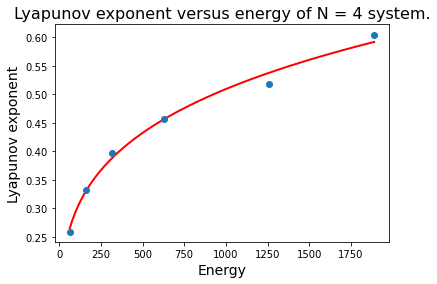

In [99]:
Energies = [63, 157.5, 315, 630, 1260, 1890]
LyapunovsNis4 =  [0.25885123160130424, 0.332655, 0.3970881, 0.4572278, 0.51890, 0.6035540]

plt.errorbar(Energies, LyapunovsNis4, yerr = slope_errors, fmt='o')
plt.ylabel("Lyapunov exponent", fontsize = 14)
plt.xlabel("Energy",fontsize = 14)
plt.title("Lyapunov exponent versus energy of N = 4 system.",fontsize = 16)

def fitterfunc(x,a,coeff):
    return coeff*x**a


pars1, cov1 = curve_fit(fitterfunc, Energies, LyapunovsNis4, maxfev=50000)
print(*pars1)
print(np.linalg.cond(cov1))
plt.plot(np.linspace(Energies[0],Energies[-1],1000), fitterfunc(np.linspace(Energies[0],Energies[-1],1000),
                                                                pars1[0], pars1[1]), 
         linewidth = '2', label = "line of best fit", color = "r", zorder = 2)

plt.savefig("Lyapunovs N = 4.", dpi = 100, bbox_inches = "tight")
print(np.sqrt(cov1[0,0]))
print(np.sqrt(cov1[1,1]))


# N = 7 Energy graph

0
0.16518424104777651 2.877967955965808e-05
None
1
0.2302749502728119 2.927461240525901e-05
None
2
0.2568851518357212 9.879172589330851e-05
None
3
0.31699390997327725 0.0002863661700314788
None


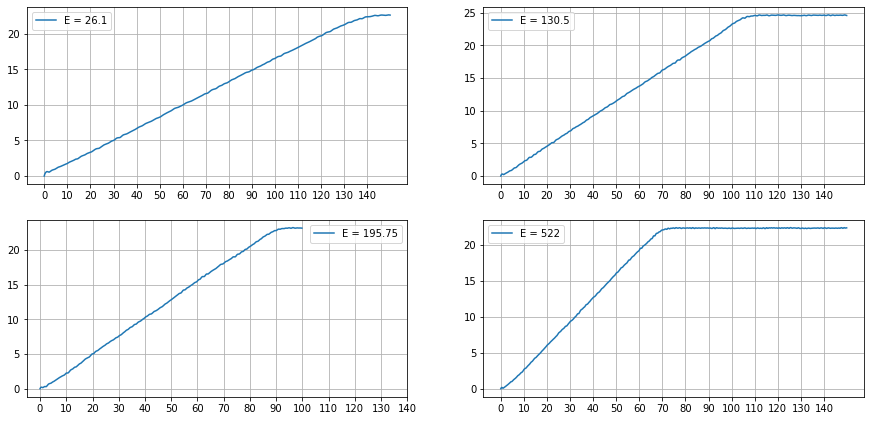

In [368]:
plt.figure(figsize=(15,15))
Nis4_dataframes = [X7_26_1_original_DF, X7_26_1_perturbed_DF, 
                   X7_130_5_original_DF, X7_130_5_perturbed_DF, 
                   X7_195_75_original_DF, X7_195_75_perturbed_DF,
                   X7_522_original_DF, X7_522_perturbed_DF]

delta_t = 1*10**-4
record_steps = 1000
time_simulated = [150,150,100,150]
graphing_end = [1500,1500,1000,1500]
labels = ["E = 26.1", "E = 130.5", "E = 195.75", "E = 522"]

scrambling_times = [130, 100, 85, 65]
for j in range(int(len(Nis4_dataframes)/2)):
    plt.subplot(4,2,j+1)
    simulation_repetitions = time_simulated[j]/delta_t
    times = np.arange(0, simulation_repetitions*delta_t-delta_t*record_steps , delta_t*record_steps)
    X1_distance = []
    for i in range(len(Nis4_dataframes[2*j])-1):
        if i < len(Nis4_dataframes[2*j+1])-2:
            X1_distance.append(Distance(Nis4_dataframes[2*j].iloc[i+1,:], Nis4_dataframes[2*j+1].iloc[i+1,:]))


            for el in X1_distance:
                el = el.real
    print(j)
    plt.plot(times[:graphing_end[j]], np.log((X1_distance)/X1_distance[0])[:graphing_end[j]], label = labels[j])    
    start = 100
    pars1, cov1 = curve_fit(fitfunc, times[start:scrambling_times[j]*10],  
                            np.log((X1_distance)/X1_distance[0])[start:scrambling_times[j]*10])
    print(print(pars1[0], np.sqrt(cov1[0][0])))
    plt.xticks(np.arange(0,150,10))
    plt.grid(True)
    plt.legend()




0.21975840911398273 0.08004105291565207
0.0025632499515658045


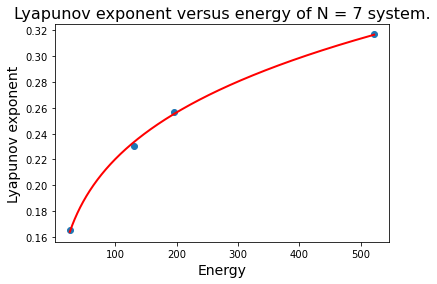

In [459]:
Energies = [26.1, 130.5, 195.75, 522]
LyapunovsNis4 =  [0.1651842, 0.23027495, 0.2568851518, 0.31699390]

plt.plot(Energies, LyapunovsNis4, "o")
plt.ylabel("Lyapunov exponent", fontsize = 14)
plt.xlabel("Energy",fontsize = 14)
plt.title("Lyapunov exponent versus energy of N = 7 system.",fontsize = 16)
def fitterfunc(x,a,coeff):
    return coeff*x**a
def logfunc(x, a, coeff):
    return coeff*np.log(x**a)
pars1, cov1 = curve_fit(fitterfunc, Energies, LyapunovsNis4, maxfev=50000)
print(*pars1)
plt.plot(np.linspace(Energies[0],Energies[-1],1000), fitterfunc(np.linspace(Energies[0],Energies[-1],1000),
                                                                pars1[0], pars1[1]),
         linewidth = '2', label = "line of best fit", color = "r", zorder = 2)

plt.savefig("Lyapunovs N = 7.", dpi = 100, bbox_inches = "tight")
print(np.sqrt(cov1[1][1]))